# Explore Kestrel Segmentation, Features and Training via PyAudioAnalysis


Note if you install ForestOgram then PyAudioAnalysis is already installed now.

Else if:

    To install PyAudioAnalysis
    ```python
    pip install pyAudioAnalysis
    ```

    Or developer version

    ```python
    git clone https://github.com/tyiannak/pyAudioAnalysis.git
    cd pyAudioAnalysis
    pip install -r ./requirements.txt
    pip install -e .
    cd ..
    ```

In [1]:
import matplotlib.pyplot as plt

import sound_segmentation

PSeg = sound_segmentation 

import sounddevice as sd
#import soundfile as sf
from pyAudioAnalysis import audioTrainTest as aT

from pydub.utils import get_array_type
import array
from pyAudioAnalysis import ShortTermFeatures, MidTermFeatures
from numpy import int16

import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from scipy.io.wavfile import write
import pandas as pd


In [2]:
#dir(aT)

<ipython-input-3-1483380e6863>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


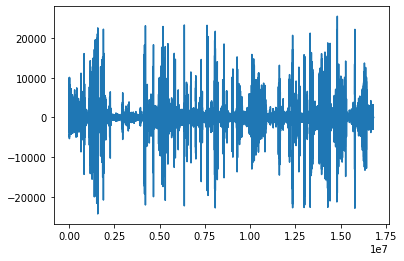

In [3]:
path = os.path.join(os.getcwd(), "../../", "inputs/mp3/mauritius_kestrel.mp3")

(fs,num_a,sound,_) = PSeg.load_data(path)
fig = plt.figure()
plt.plot(num_a)
fig.show()




<ipython-input-4-2f7d1fd48d5f>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


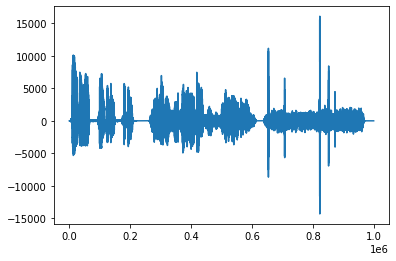

In [4]:
#sound = np.array(sound[0:1000])
#sound = np.transpose(sound)

left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8

array_type = get_array_type(bit_depth)
num_a = array.array(array_type, left._data)

fig = plt.figure()
plt.plot(num_a[0:1000000])
fig.show()


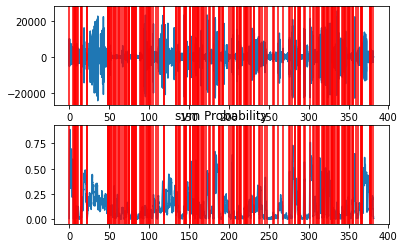

In [5]:
segments = aS.silence_removal(np.array(num_a), fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.1, plot = True)



# Show just a truncated version of the segmentated signal


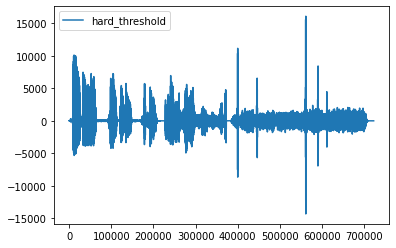

In [6]:

segs_th=[]
for ind,seg in enumerate(segments):
    if ind<6:
        onset = int(seg[0]*fs)
        offset = int(seg[1]*fs)
        wave = num_a[onset:offset]
        segs_th.extend(wave)
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()

In [7]:


# need to convert array to type Int64
# before you can expect this method to work.
#filename = 'myfile.wav'
# Extract data and sampling rate from file
#data, fs = sf.read(filename, dtype='float32')  
#sd.play(segs_th, fs)
#status = sd.wait()  # Wait until file is done playing

/home/user/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


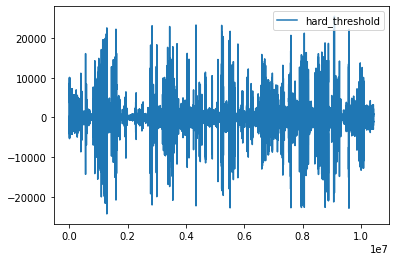

In [8]:

segs_th_trunc=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th_trunc.extend(wave)
    
segs_th_trunc = np.array(segs_th_trunc)
    
fig = plt.figure()
plt.plot(segs_th_trunc,label="hard_threshold")

plt.legend()
plt.show()    





# Writing to file means that can use PyAudio's bash API


In [9]:
write("../kestrel_segs_th.wav", fs, int16(segs_th))


In [10]:
!ls ../kestrel_segs_th.wav
!du -h ../kestrel_segs_th.wav

../kestrel_segs_th.wav
1.4M	../kestrel_segs_th.wav


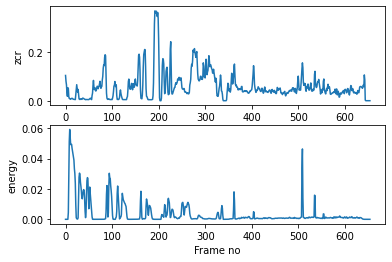

In [11]:
#from pyAudioAnalysis import audioBasicIO
F, f_names = ShortTermFeatures.feature_extraction(segs_th, fs, 0.050*fs, 0.025*fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [30]:
matrix_ = aT.features_to_matrix(F)
#print(np.shape(matrix_))
#plt.imshow(matrix_[:])

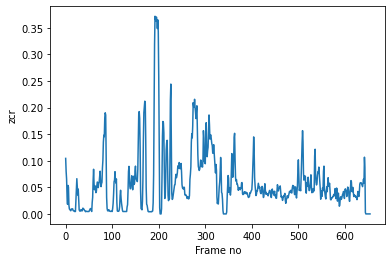

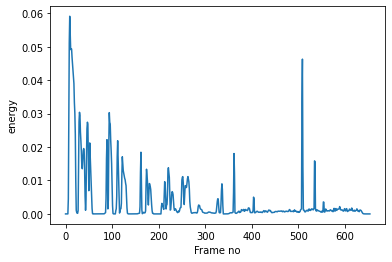

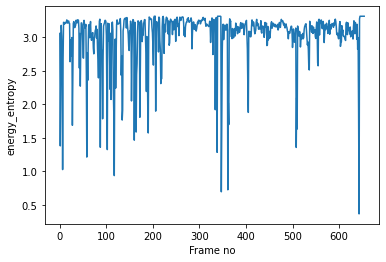

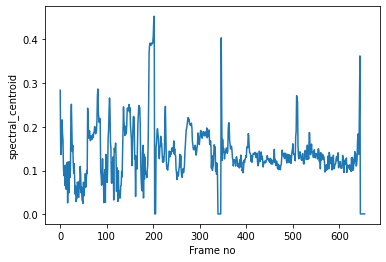

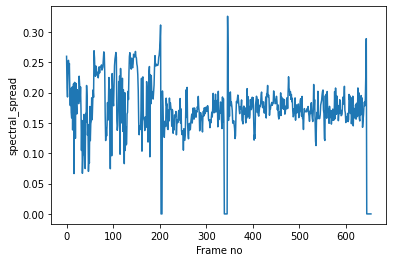

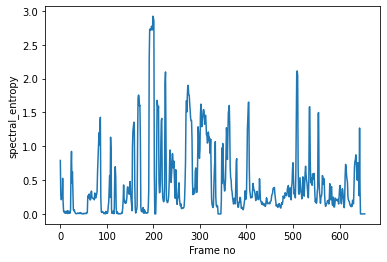

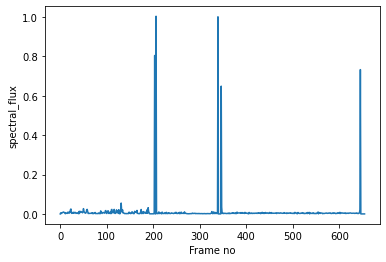

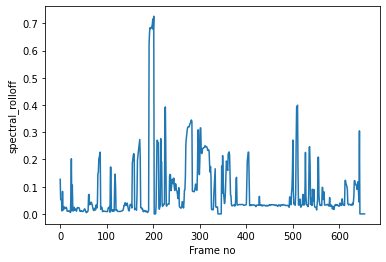

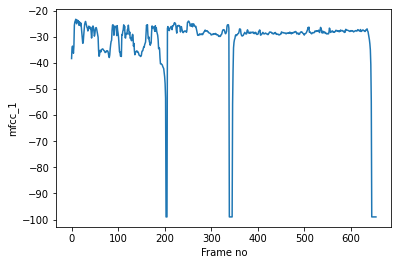

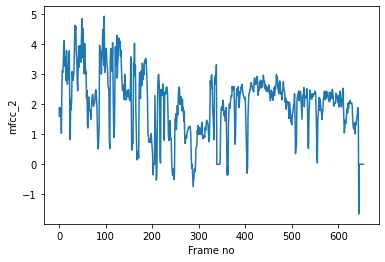

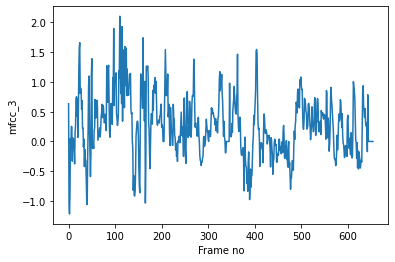

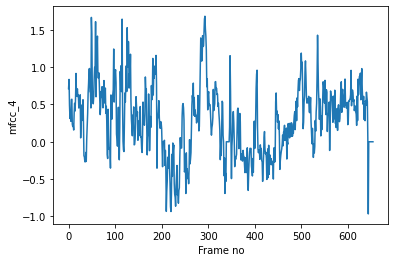

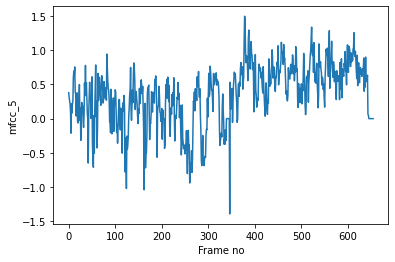

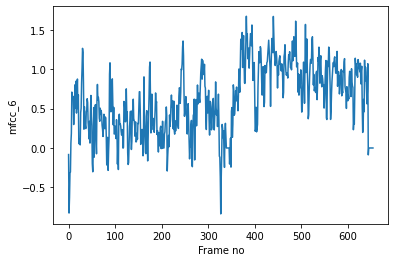

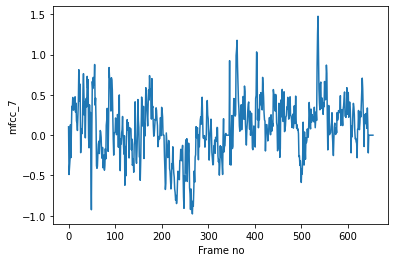

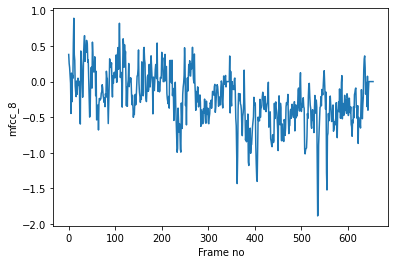

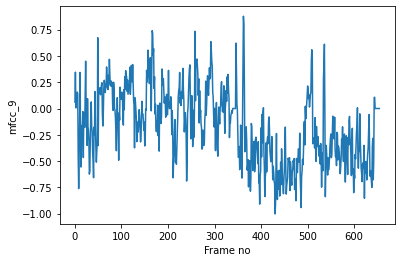

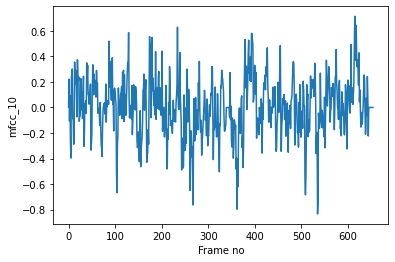

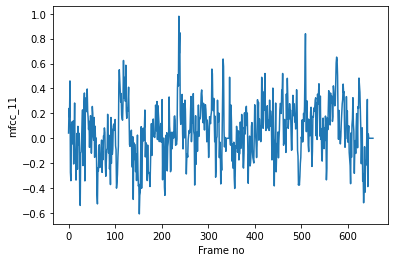

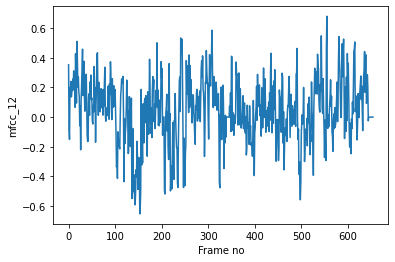

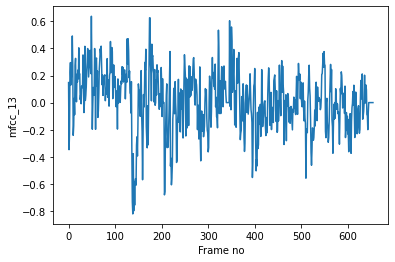

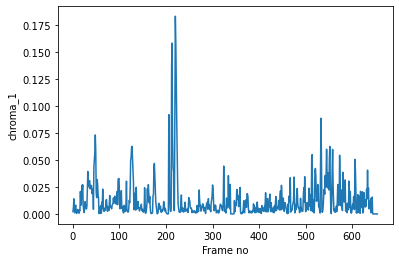

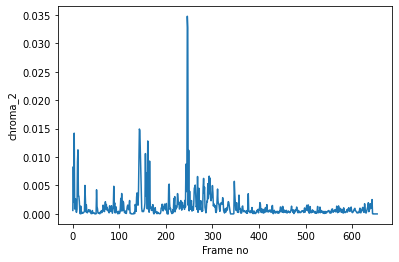

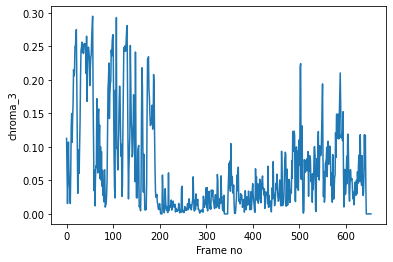

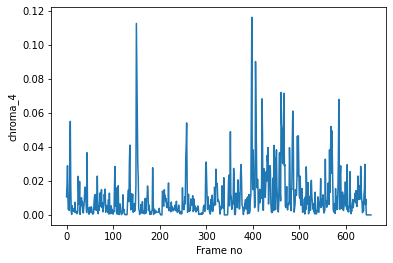

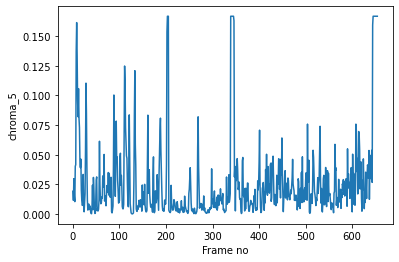

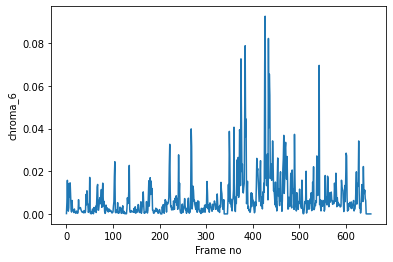

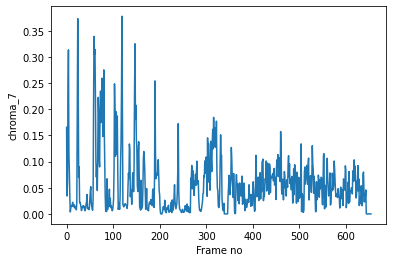

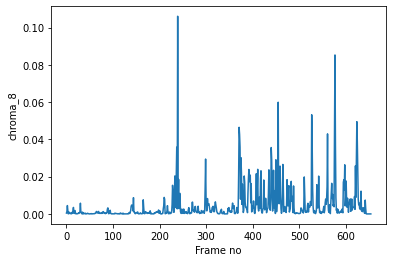

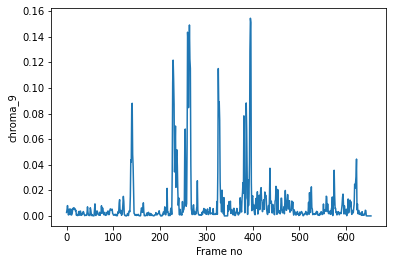

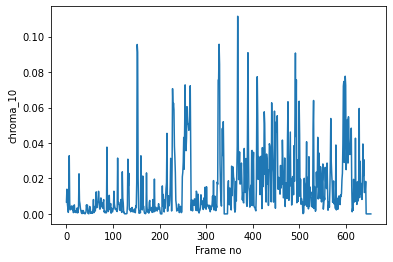

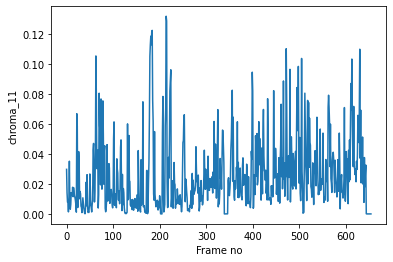

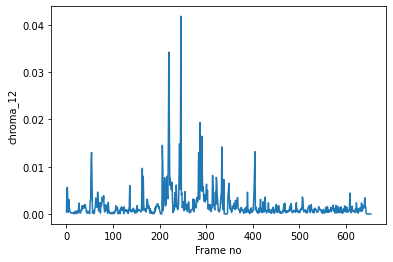

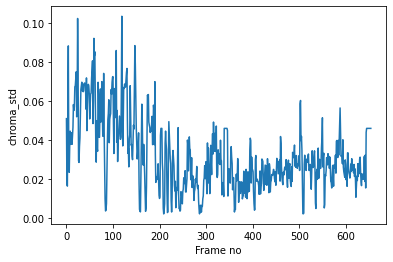

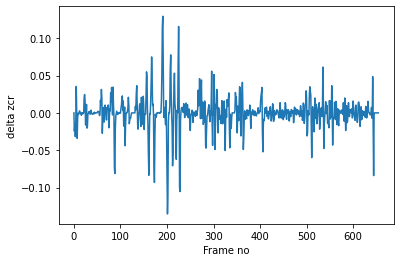

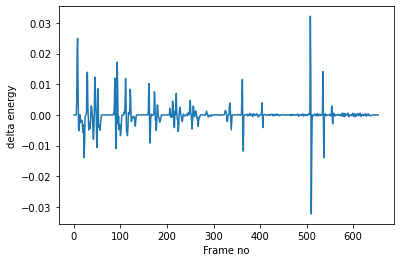

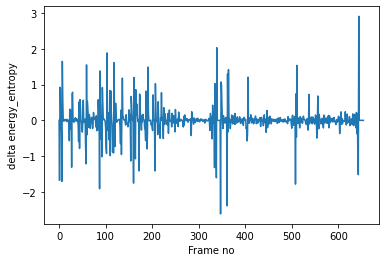

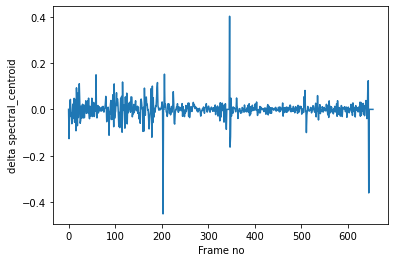

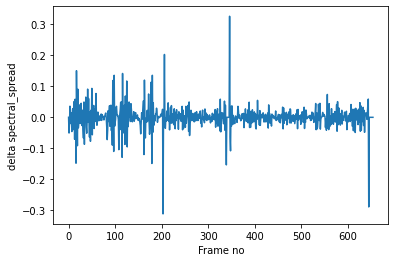

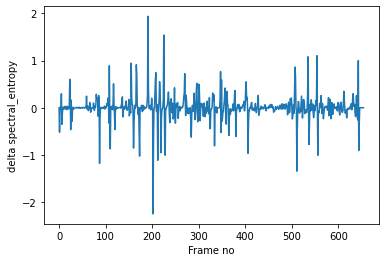

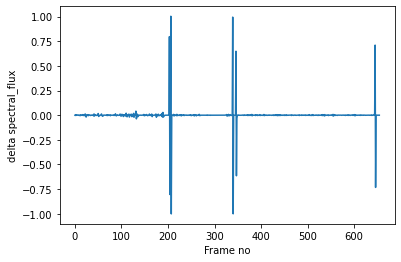

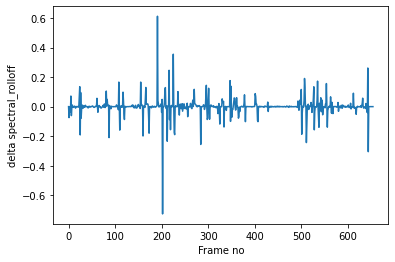

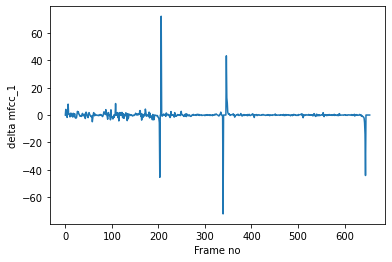

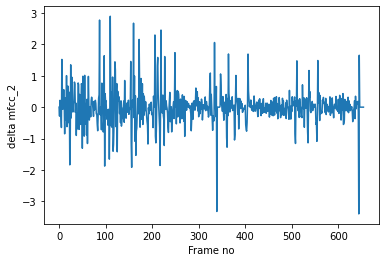

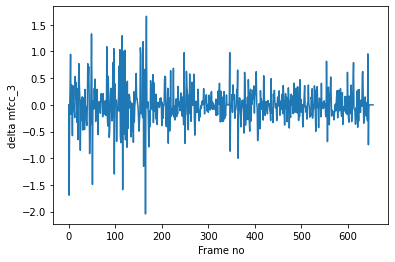

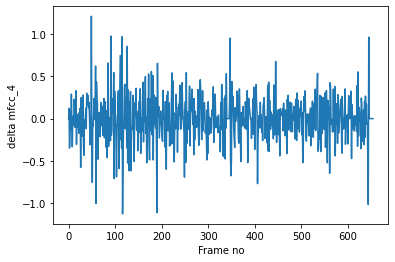

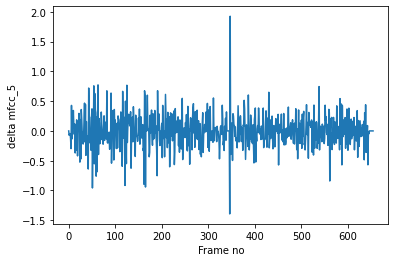

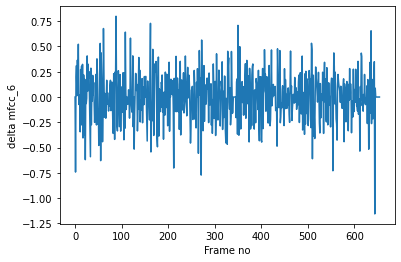

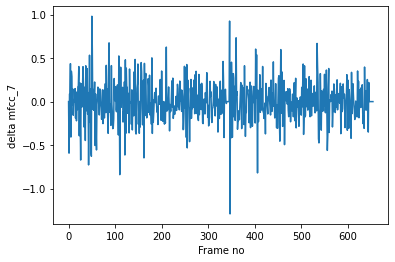

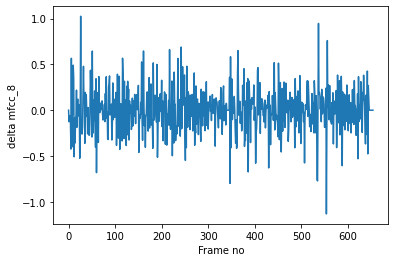

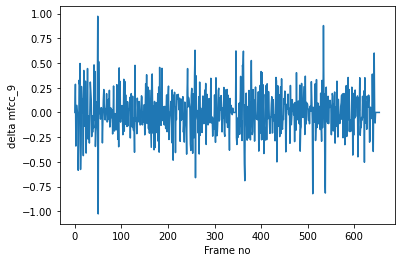

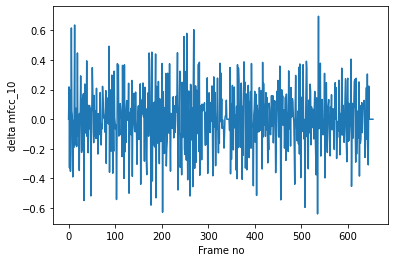

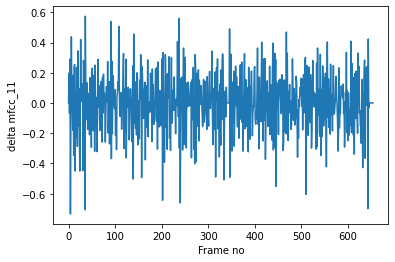

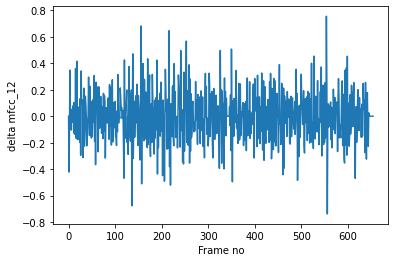

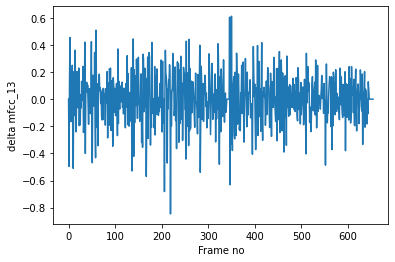

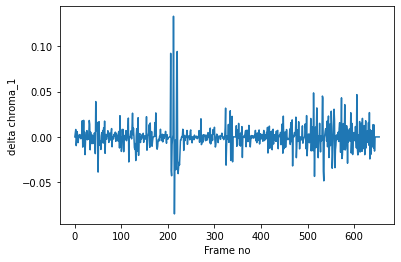

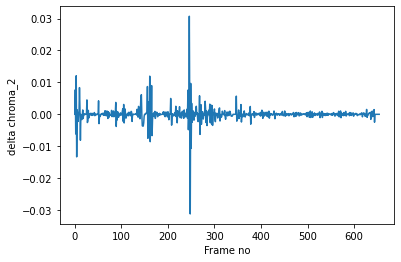

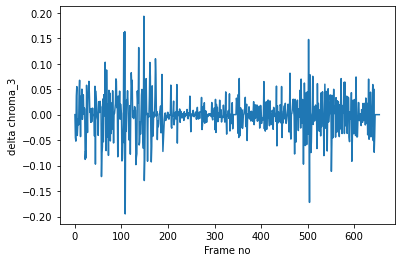

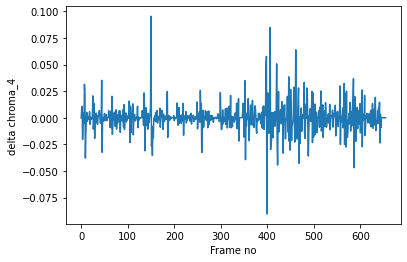

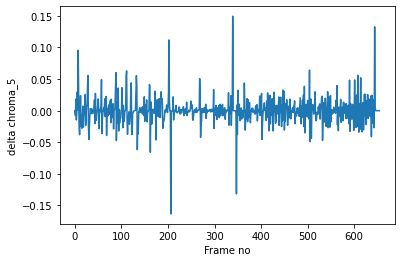

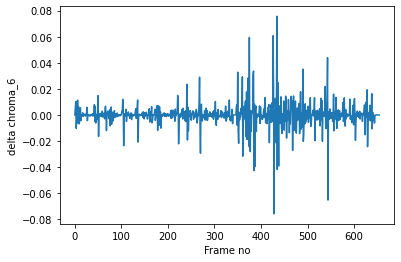

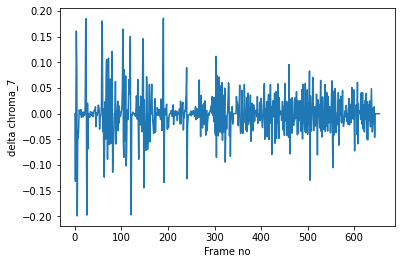

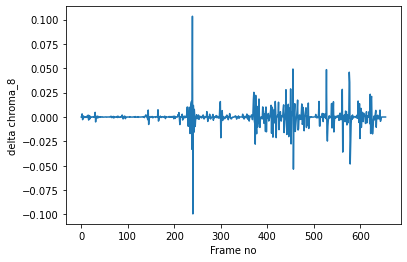

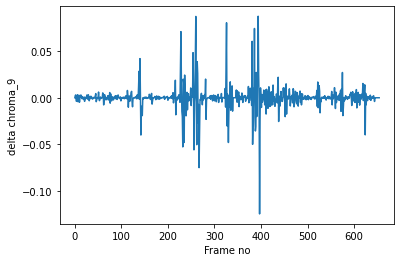

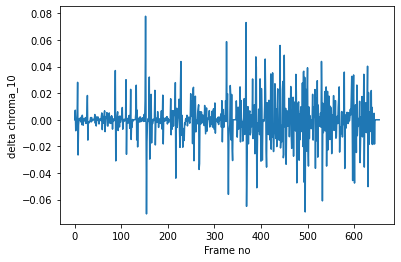

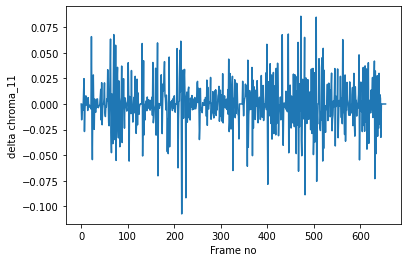

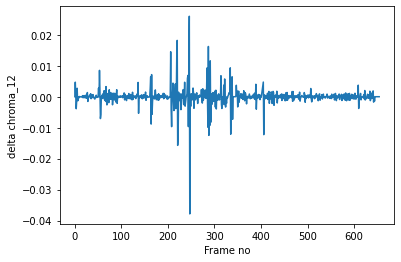

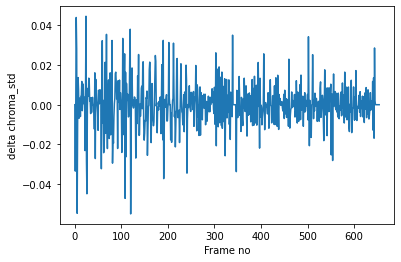

In [13]:
for i,name in enumerate(f_names):
    fig = plt.figure()
    plt.plot(F[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[i]) 
    plt.show()


In [14]:

df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(F, f_names)}])
df=df.T
df

0
zcr                  39.139292
energy                2.573400
energy_entropy     1983.814288
spectral_centroid    90.353860
spectral_spread     113.105188
...                        ...
delta chroma_9       -0.002681
delta chroma_10      -0.006729
delta chroma_11      -0.029773
delta chroma_12      -0.000367
delta chroma_std     -0.004999

[68 rows x 1 columns]

In [25]:
midFeat,shortFeat,midFeatLabels=MidTermFeatures.mid_feature_extraction(
    segs_th,
    fs,
    0.43*fs, 0.43*fs,
    0.16*fs, 0.16*fs
)
matrix_mid = aT.features_to_matrix(midFeat)


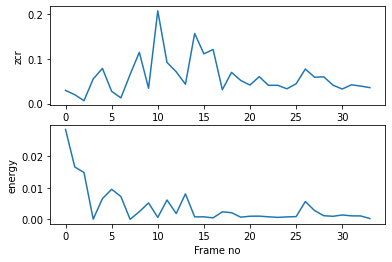

In [26]:
F = midFeat
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

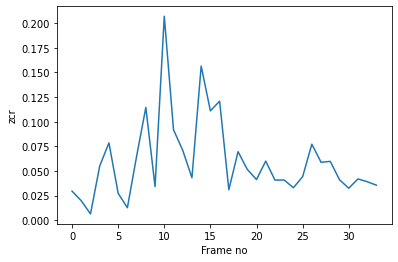

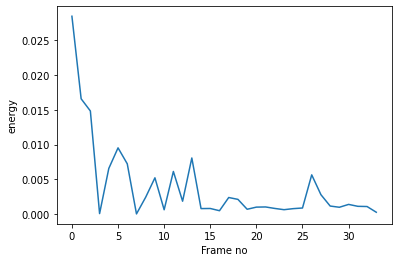

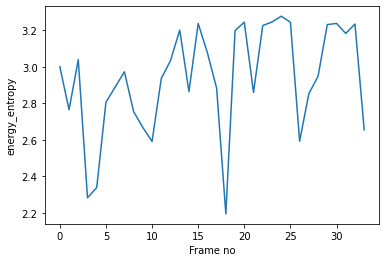

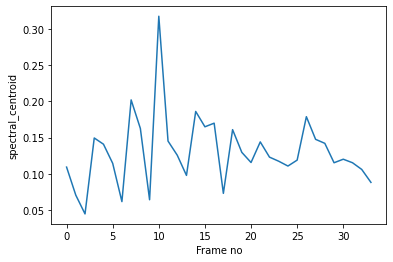

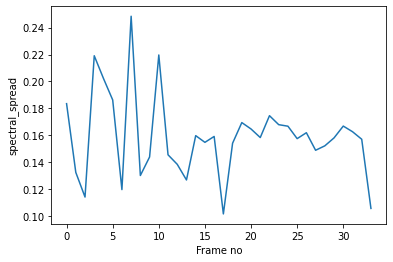

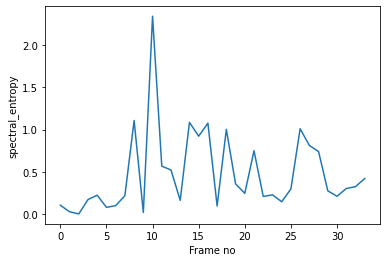

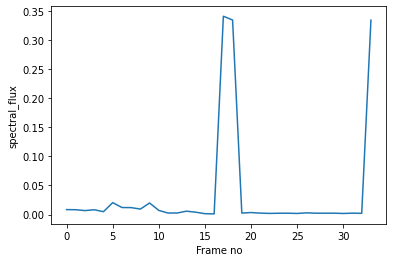

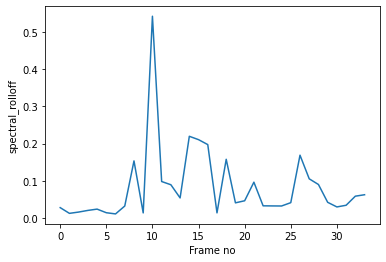

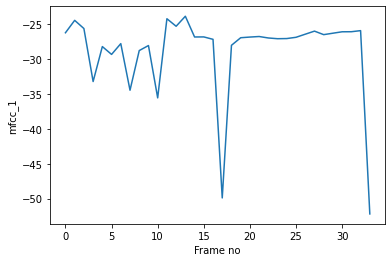

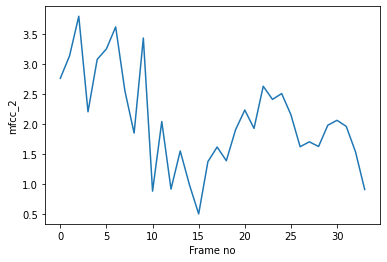

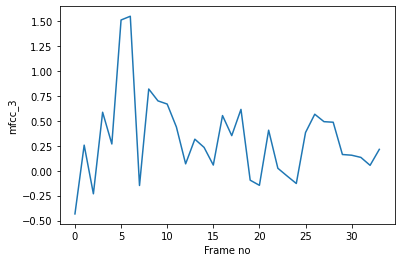

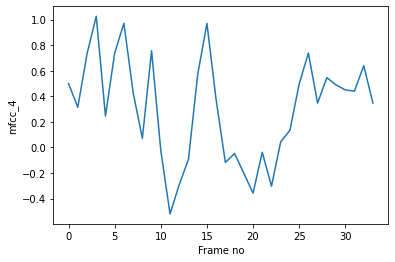

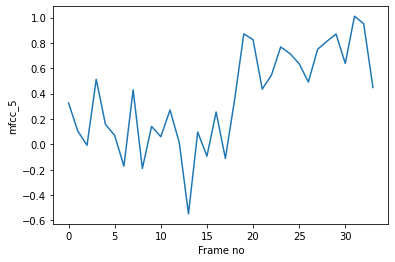

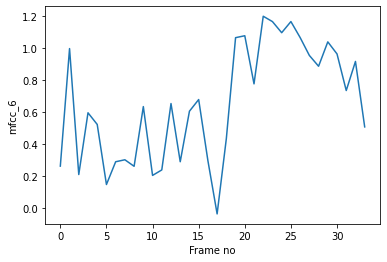

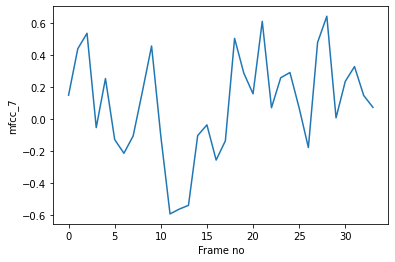

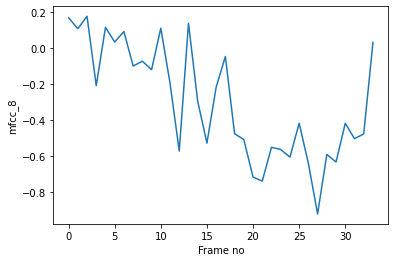

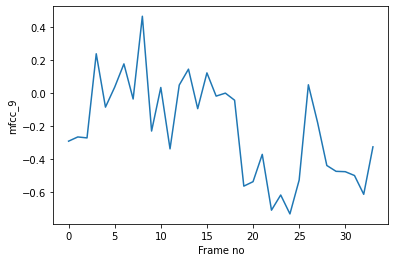

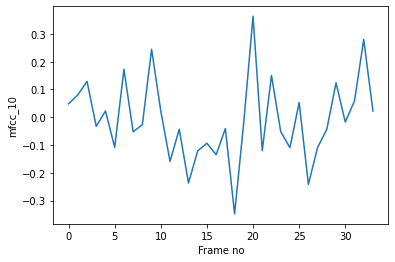

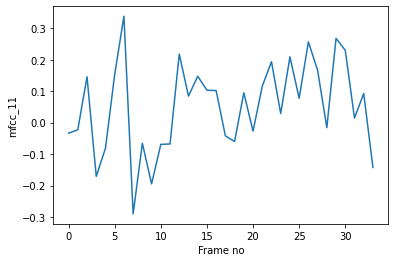

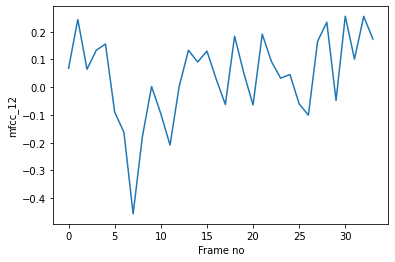

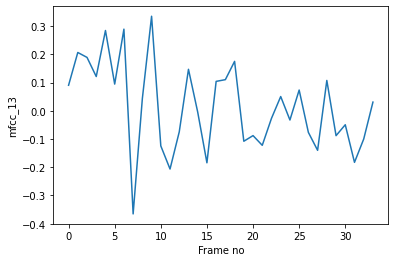

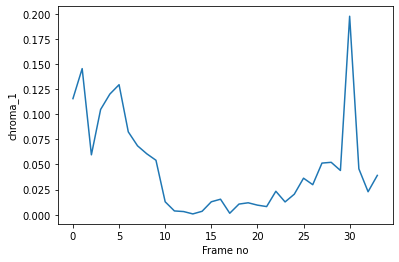

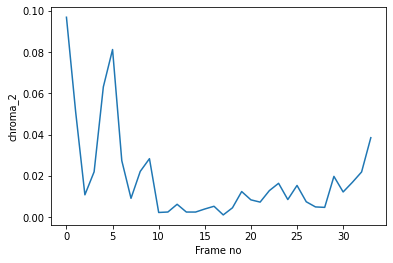

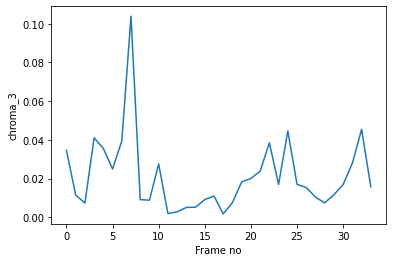

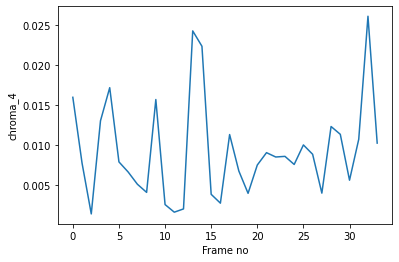

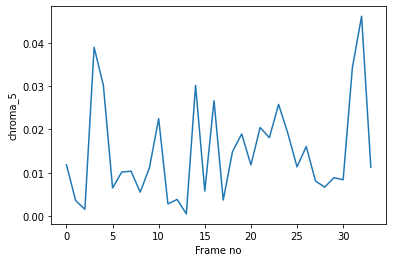

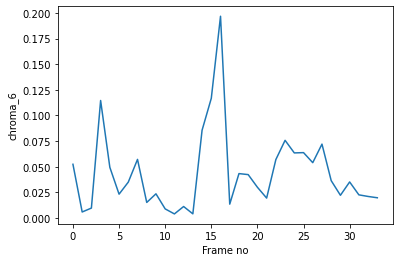

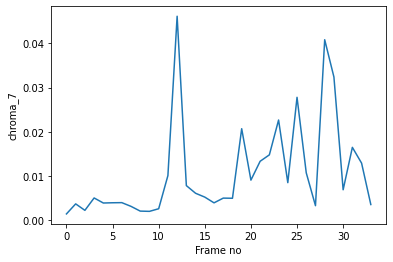

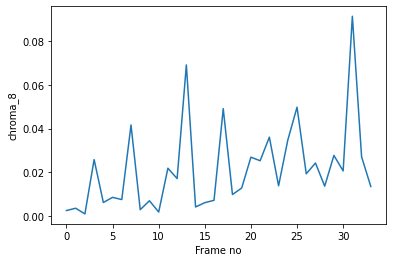

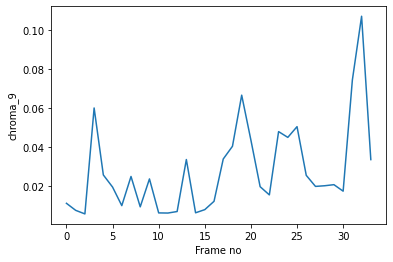

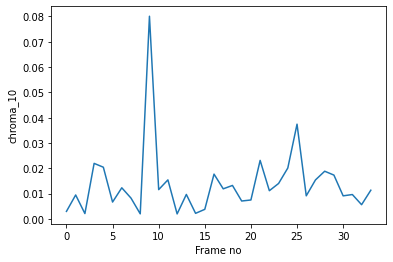

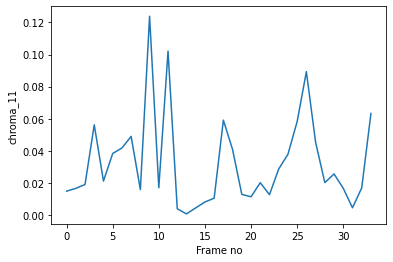

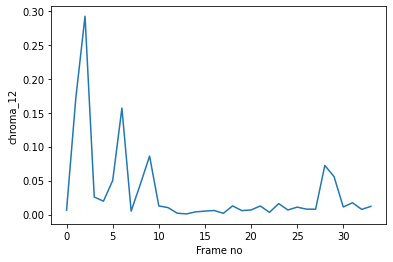

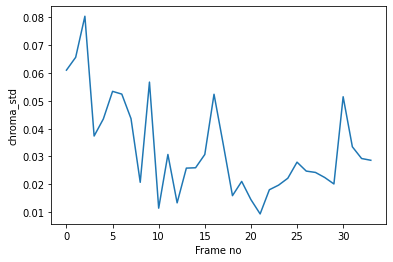

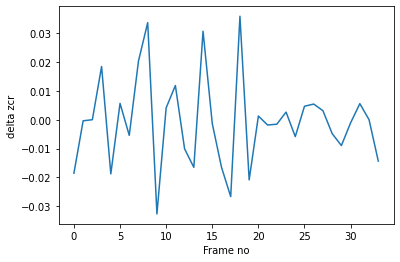

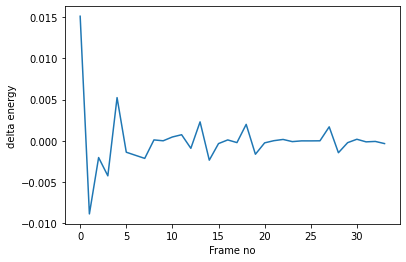

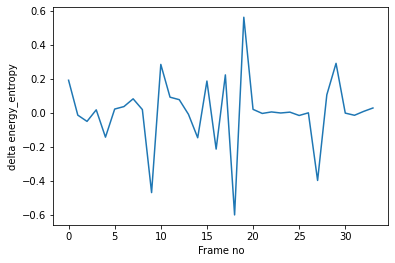

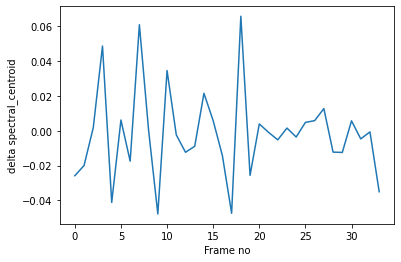

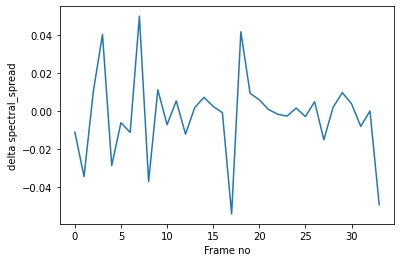

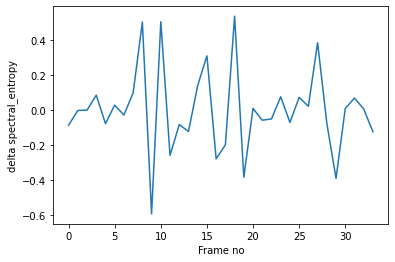

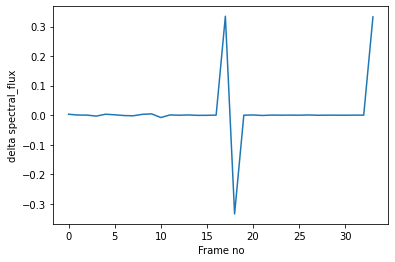

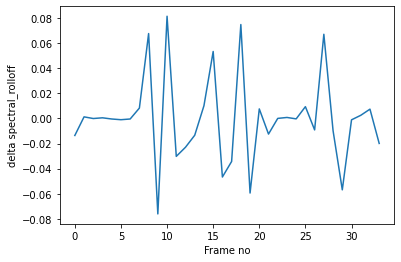

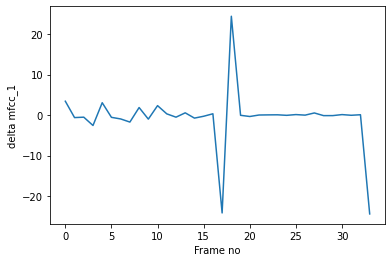

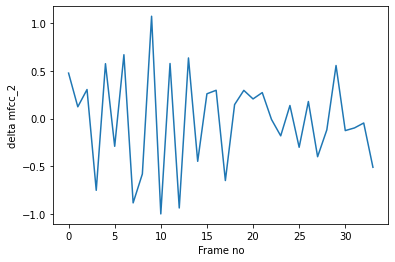

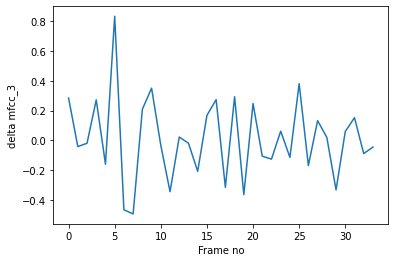

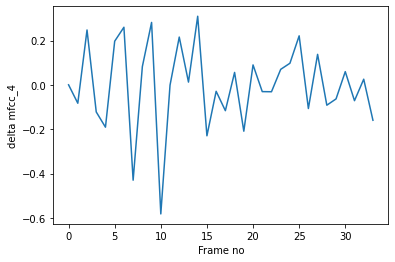

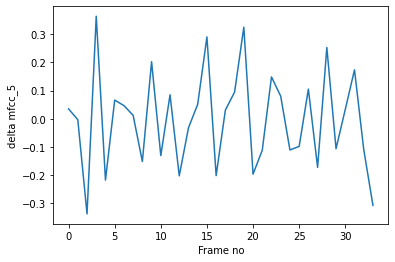

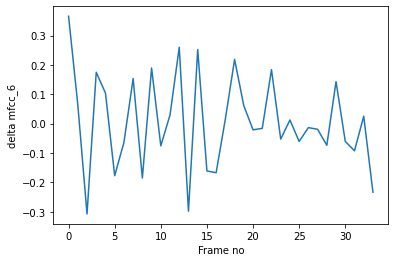

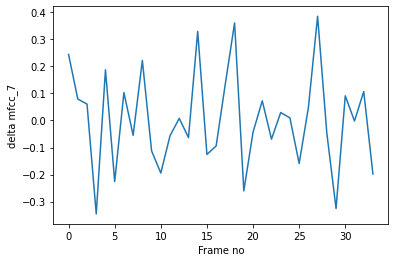

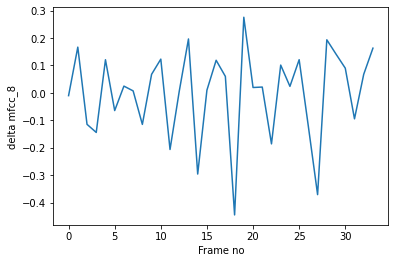

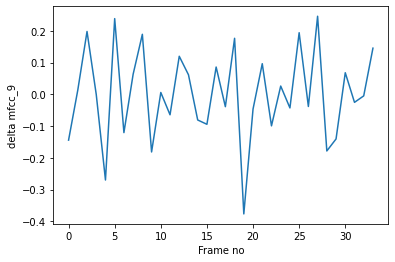

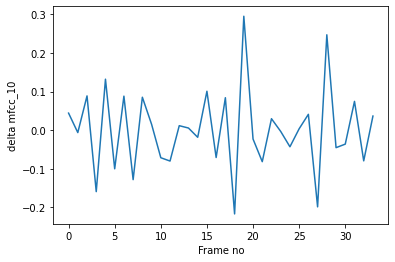

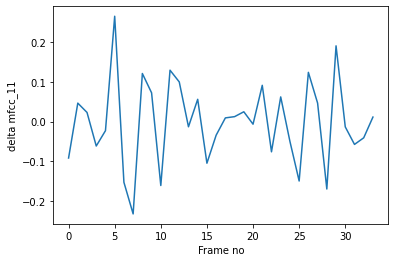

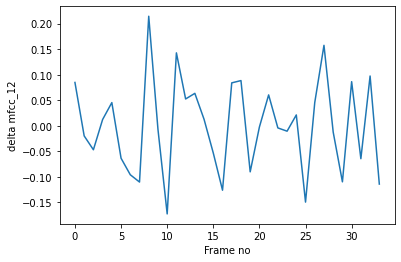

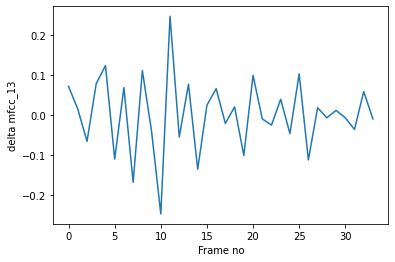

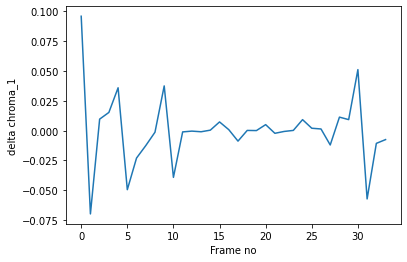

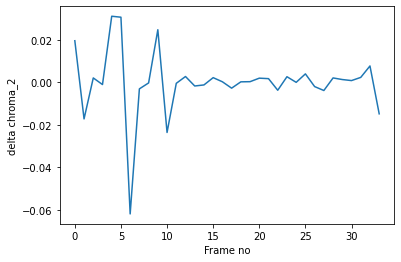

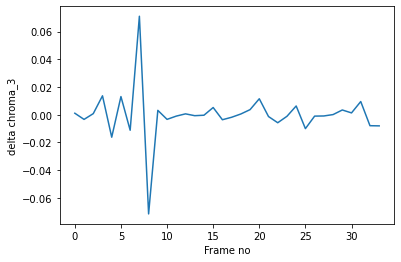

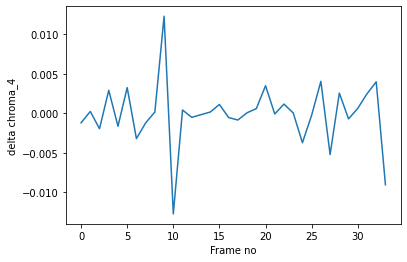

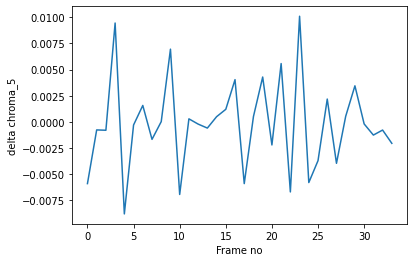

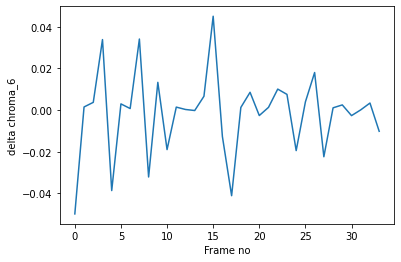

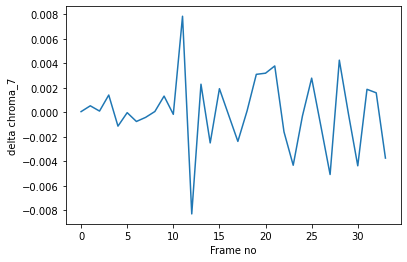

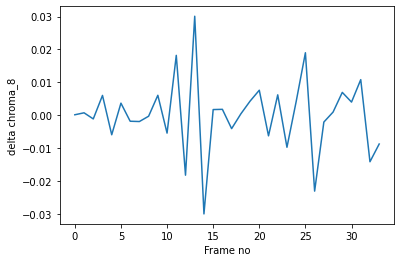

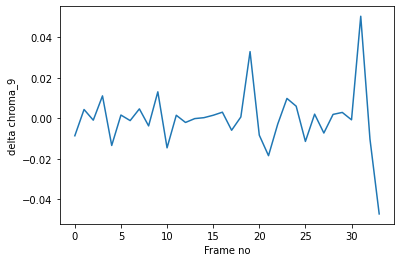

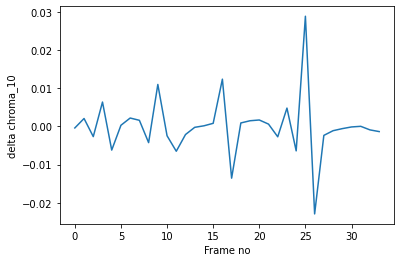

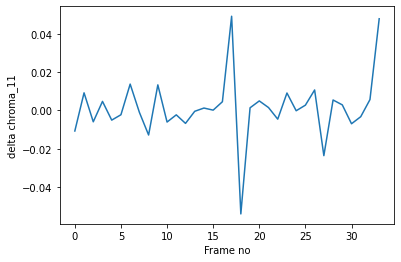

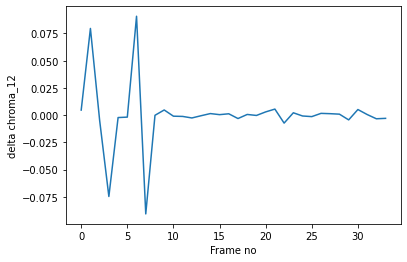

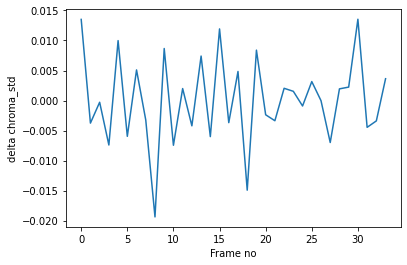

In [27]:
for i,name in enumerate(f_names):
    fig = plt.figure()
    plt.plot(F[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[i]) 
    plt.show()


In [28]:
df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(midFeat, midFeatLabels)}])
df=df.T
df

0
zcr_mean                 2.040775
energy_mean              0.133964
energy_entropy_mean     99.754818
spectral_centroid_mean   4.428869
spectral_spread_mean     5.413383
...                           ...
delta chroma_9_std       0.845791
delta chroma_10_std      0.578376
delta chroma_11_std      1.005393
delta chroma_12_std      1.209153
delta chroma_std_std     0.610162

[136 rows x 1 columns]

# Train on a directory full of random experiments
Not real training data.

Note this shows nothing, except for correct syntax of `extract_features_and_train`
method.

Training data is almost random nonsense on two birds.

In [34]:
aT.extract_features_and_train("../", 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmModel", False)

Analyzing file 1 of 6: ./segment_0.wav
Analyzing file 2 of 6: ./segment_1.wav
Analyzing file 3 of 6: ./segment_2.wav
Analyzing file 4 of 6: ./segment_3.wav
Analyzing file 5 of 6: ./segment_4.wav
Analyzing file 6 of 6: ./segment_5.wav
Feature extraction complexity ratio: 13.5 x realtime
Analyzing file 1 of 6: ./segment_0.wav
Analyzing file 2 of 6: ./segment_1.wav
Analyzing file 3 of 6: ./segment_2.wav
Analyzing file 4 of 6: ./segment_3.wav
Analyzing file 5 of 6: ./segment_4.wav
Analyzing file 6 of 6: ./segment_5.wav
Feature extraction complexity ratio: 12.4 x realtime
Param = 0.00100 - classifier Evaluation Experiment 1 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4 of 4167
Param = 0.00100 - classifier Evaluation Experiment 5 of 4167
Param = 0.00100 - classifier Evaluation Experiment 6 of 4167
Param = 0.00100 - classifier Evaluation Experiment 7 of 4167

Param = 0.00100 - classifier Evaluation Experiment 139 of 4167
Param = 0.00100 - classifier Evaluation Experiment 140 of 4167
Param = 0.00100 - classifier Evaluation Experiment 141 of 4167
Param = 0.00100 - classifier Evaluation Experiment 142 of 4167
Param = 0.00100 - classifier Evaluation Experiment 143 of 4167
Param = 0.00100 - classifier Evaluation Experiment 144 of 4167
Param = 0.00100 - classifier Evaluation Experiment 145 of 4167
Param = 0.00100 - classifier Evaluation Experiment 146 of 4167
Param = 0.00100 - classifier Evaluation Experiment 147 of 4167
Param = 0.00100 - classifier Evaluation Experiment 148 of 4167
Param = 0.00100 - classifier Evaluation Experiment 149 of 4167
Param = 0.00100 - classifier Evaluation Experiment 150 of 4167
Param = 0.00100 - classifier Evaluation Experiment 151 of 4167
Param = 0.00100 - classifier Evaluation Experiment 152 of 4167
Param = 0.00100 - classifier Evaluation Experiment 153 of 4167
Param = 0.00100 - classifier Evaluation Experiment 154 

Param = 0.00100 - classifier Evaluation Experiment 279 of 4167
Param = 0.00100 - classifier Evaluation Experiment 280 of 4167
Param = 0.00100 - classifier Evaluation Experiment 281 of 4167
Param = 0.00100 - classifier Evaluation Experiment 282 of 4167
Param = 0.00100 - classifier Evaluation Experiment 283 of 4167
Param = 0.00100 - classifier Evaluation Experiment 284 of 4167
Param = 0.00100 - classifier Evaluation Experiment 285 of 4167
Param = 0.00100 - classifier Evaluation Experiment 286 of 4167
Param = 0.00100 - classifier Evaluation Experiment 287 of 4167
Param = 0.00100 - classifier Evaluation Experiment 288 of 4167
Param = 0.00100 - classifier Evaluation Experiment 289 of 4167
Param = 0.00100 - classifier Evaluation Experiment 290 of 4167
Param = 0.00100 - classifier Evaluation Experiment 291 of 4167
Param = 0.00100 - classifier Evaluation Experiment 292 of 4167
Param = 0.00100 - classifier Evaluation Experiment 293 of 4167
Param = 0.00100 - classifier Evaluation Experiment 294 

Param = 0.00100 - classifier Evaluation Experiment 419 of 4167
Param = 0.00100 - classifier Evaluation Experiment 420 of 4167
Param = 0.00100 - classifier Evaluation Experiment 421 of 4167
Param = 0.00100 - classifier Evaluation Experiment 422 of 4167
Param = 0.00100 - classifier Evaluation Experiment 423 of 4167
Param = 0.00100 - classifier Evaluation Experiment 424 of 4167
Param = 0.00100 - classifier Evaluation Experiment 425 of 4167
Param = 0.00100 - classifier Evaluation Experiment 426 of 4167
Param = 0.00100 - classifier Evaluation Experiment 427 of 4167
Param = 0.00100 - classifier Evaluation Experiment 428 of 4167
Param = 0.00100 - classifier Evaluation Experiment 429 of 4167
Param = 0.00100 - classifier Evaluation Experiment 430 of 4167
Param = 0.00100 - classifier Evaluation Experiment 431 of 4167
Param = 0.00100 - classifier Evaluation Experiment 432 of 4167
Param = 0.00100 - classifier Evaluation Experiment 433 of 4167
Param = 0.00100 - classifier Evaluation Experiment 434 

Param = 0.00100 - classifier Evaluation Experiment 558 of 4167
Param = 0.00100 - classifier Evaluation Experiment 559 of 4167
Param = 0.00100 - classifier Evaluation Experiment 560 of 4167
Param = 0.00100 - classifier Evaluation Experiment 561 of 4167
Param = 0.00100 - classifier Evaluation Experiment 562 of 4167
Param = 0.00100 - classifier Evaluation Experiment 563 of 4167
Param = 0.00100 - classifier Evaluation Experiment 564 of 4167
Param = 0.00100 - classifier Evaluation Experiment 565 of 4167
Param = 0.00100 - classifier Evaluation Experiment 566 of 4167
Param = 0.00100 - classifier Evaluation Experiment 567 of 4167
Param = 0.00100 - classifier Evaluation Experiment 568 of 4167
Param = 0.00100 - classifier Evaluation Experiment 569 of 4167
Param = 0.00100 - classifier Evaluation Experiment 570 of 4167
Param = 0.00100 - classifier Evaluation Experiment 571 of 4167
Param = 0.00100 - classifier Evaluation Experiment 572 of 4167
Param = 0.00100 - classifier Evaluation Experiment 573 

Param = 0.00100 - classifier Evaluation Experiment 700 of 4167
Param = 0.00100 - classifier Evaluation Experiment 701 of 4167
Param = 0.00100 - classifier Evaluation Experiment 702 of 4167
Param = 0.00100 - classifier Evaluation Experiment 703 of 4167
Param = 0.00100 - classifier Evaluation Experiment 704 of 4167
Param = 0.00100 - classifier Evaluation Experiment 705 of 4167
Param = 0.00100 - classifier Evaluation Experiment 706 of 4167
Param = 0.00100 - classifier Evaluation Experiment 707 of 4167
Param = 0.00100 - classifier Evaluation Experiment 708 of 4167
Param = 0.00100 - classifier Evaluation Experiment 709 of 4167
Param = 0.00100 - classifier Evaluation Experiment 710 of 4167
Param = 0.00100 - classifier Evaluation Experiment 711 of 4167
Param = 0.00100 - classifier Evaluation Experiment 712 of 4167
Param = 0.00100 - classifier Evaluation Experiment 713 of 4167
Param = 0.00100 - classifier Evaluation Experiment 714 of 4167
Param = 0.00100 - classifier Evaluation Experiment 715 

Param = 0.00100 - classifier Evaluation Experiment 842 of 4167
Param = 0.00100 - classifier Evaluation Experiment 843 of 4167
Param = 0.00100 - classifier Evaluation Experiment 844 of 4167
Param = 0.00100 - classifier Evaluation Experiment 845 of 4167
Param = 0.00100 - classifier Evaluation Experiment 846 of 4167
Param = 0.00100 - classifier Evaluation Experiment 847 of 4167
Param = 0.00100 - classifier Evaluation Experiment 848 of 4167
Param = 0.00100 - classifier Evaluation Experiment 849 of 4167
Param = 0.00100 - classifier Evaluation Experiment 850 of 4167
Param = 0.00100 - classifier Evaluation Experiment 851 of 4167
Param = 0.00100 - classifier Evaluation Experiment 852 of 4167
Param = 0.00100 - classifier Evaluation Experiment 853 of 4167
Param = 0.00100 - classifier Evaluation Experiment 854 of 4167
Param = 0.00100 - classifier Evaluation Experiment 855 of 4167
Param = 0.00100 - classifier Evaluation Experiment 856 of 4167
Param = 0.00100 - classifier Evaluation Experiment 857 

Param = 0.00100 - classifier Evaluation Experiment 983 of 4167
Param = 0.00100 - classifier Evaluation Experiment 984 of 4167
Param = 0.00100 - classifier Evaluation Experiment 985 of 4167
Param = 0.00100 - classifier Evaluation Experiment 986 of 4167
Param = 0.00100 - classifier Evaluation Experiment 987 of 4167
Param = 0.00100 - classifier Evaluation Experiment 988 of 4167
Param = 0.00100 - classifier Evaluation Experiment 989 of 4167
Param = 0.00100 - classifier Evaluation Experiment 990 of 4167
Param = 0.00100 - classifier Evaluation Experiment 991 of 4167
Param = 0.00100 - classifier Evaluation Experiment 992 of 4167
Param = 0.00100 - classifier Evaluation Experiment 993 of 4167
Param = 0.00100 - classifier Evaluation Experiment 994 of 4167
Param = 0.00100 - classifier Evaluation Experiment 995 of 4167
Param = 0.00100 - classifier Evaluation Experiment 996 of 4167
Param = 0.00100 - classifier Evaluation Experiment 997 of 4167
Param = 0.00100 - classifier Evaluation Experiment 998 

Param = 0.00100 - classifier Evaluation Experiment 1125 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1126 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1127 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1128 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1129 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1130 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1131 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1132 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1133 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1134 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1135 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1136 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1137 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1138 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1139 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1266 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1267 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1268 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1269 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1270 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1271 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1272 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1273 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1274 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1275 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1276 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1277 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1278 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1279 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1280 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1405 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1406 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1407 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1408 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1409 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1410 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1411 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1412 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1413 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1414 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1415 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1416 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1417 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1418 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1419 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1538 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1539 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1540 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1541 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1542 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1543 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1544 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1545 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1546 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1547 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1548 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1549 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1550 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1551 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1552 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1730 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1731 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1732 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1733 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1734 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1735 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1736 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1737 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1738 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1739 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1740 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1741 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1742 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1743 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1744 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1886 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1887 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1888 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1889 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1890 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1891 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1892 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1893 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1894 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1895 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1896 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1897 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1898 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1899 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1900 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2046 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2047 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2048 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2049 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2050 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2051 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2052 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2053 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2054 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2055 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2056 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2057 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2058 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2059 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2060 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2243 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2244 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2245 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2246 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2247 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2248 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2249 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2250 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2251 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2252 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2253 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2254 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2255 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2256 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2257 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2380 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2381 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2382 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2383 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2384 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2385 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2386 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2387 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2388 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2389 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2390 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2391 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2392 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2393 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2394 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2513 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2514 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2515 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2516 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2517 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2518 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2519 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2520 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2521 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2522 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2523 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2524 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2525 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2526 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2527 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2691 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2692 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2693 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2694 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2695 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2696 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2697 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2698 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2699 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2700 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2701 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2702 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2703 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2704 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2705 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2824 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2825 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2826 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2827 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2828 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2829 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2830 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2831 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2832 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2833 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2834 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2835 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2836 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2837 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2838 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2972 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2973 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2974 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2975 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2976 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2977 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2978 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2979 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2980 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2981 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2982 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2983 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2984 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2985 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2986 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3162 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3163 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3164 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3165 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3166 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3167 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3168 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3169 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3170 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3171 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3172 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3173 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3174 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3175 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3176 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3319 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3320 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3321 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3322 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3323 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3324 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3325 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3326 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3327 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3328 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3329 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3330 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3331 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3332 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3333 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3465 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3466 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3467 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3468 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3469 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3470 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3471 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3472 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3473 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3474 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3475 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3476 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3477 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3478 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3479 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3602 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3603 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3604 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3605 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3606 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3607 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3608 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3609 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3610 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3611 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3612 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3613 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3614 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3615 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3616 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3765 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3766 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3767 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3768 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3769 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3770 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3771 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3772 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3773 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3774 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3775 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3776 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3777 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3778 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3779 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3922 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3923 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3924 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3925 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3926 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3927 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3928 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3929 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3930 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3931 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3932 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3933 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3934 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3935 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3936 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 4093 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4094 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4095 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4096 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4097 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4098 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4099 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4100 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4101 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4102 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4103 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4104 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4105 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4106 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4107 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 67 of 4167
Param = 0.01000 - classifier Evaluation Experiment 68 of 4167
Param = 0.01000 - classifier Evaluation Experiment 69 of 4167
Param = 0.01000 - classifier Evaluation Experiment 70 of 4167
Param = 0.01000 - classifier Evaluation Experiment 71 of 4167
Param = 0.01000 - classifier Evaluation Experiment 72 of 4167
Param = 0.01000 - classifier Evaluation Experiment 73 of 4167
Param = 0.01000 - classifier Evaluation Experiment 74 of 4167
Param = 0.01000 - classifier Evaluation Experiment 75 of 4167
Param = 0.01000 - classifier Evaluation Experiment 76 of 4167
Param = 0.01000 - classifier Evaluation Experiment 77 of 4167
Param = 0.01000 - classifier Evaluation Experiment 78 of 4167
Param = 0.01000 - classifier Evaluation Experiment 79 of 4167
Param = 0.01000 - classifier Evaluation Experiment 80 of 4167
Param = 0.01000 - classifier Evaluation Experiment 81 of 4167
Param = 0.01000 - classifier Evaluation Experiment 82 of 4167
Param = 

Param = 0.01000 - classifier Evaluation Experiment 209 of 4167
Param = 0.01000 - classifier Evaluation Experiment 210 of 4167
Param = 0.01000 - classifier Evaluation Experiment 211 of 4167
Param = 0.01000 - classifier Evaluation Experiment 212 of 4167
Param = 0.01000 - classifier Evaluation Experiment 213 of 4167
Param = 0.01000 - classifier Evaluation Experiment 214 of 4167
Param = 0.01000 - classifier Evaluation Experiment 215 of 4167
Param = 0.01000 - classifier Evaluation Experiment 216 of 4167
Param = 0.01000 - classifier Evaluation Experiment 217 of 4167
Param = 0.01000 - classifier Evaluation Experiment 218 of 4167
Param = 0.01000 - classifier Evaluation Experiment 219 of 4167
Param = 0.01000 - classifier Evaluation Experiment 220 of 4167
Param = 0.01000 - classifier Evaluation Experiment 221 of 4167
Param = 0.01000 - classifier Evaluation Experiment 222 of 4167
Param = 0.01000 - classifier Evaluation Experiment 223 of 4167
Param = 0.01000 - classifier Evaluation Experiment 224 

Param = 0.01000 - classifier Evaluation Experiment 356 of 4167
Param = 0.01000 - classifier Evaluation Experiment 357 of 4167
Param = 0.01000 - classifier Evaluation Experiment 358 of 4167
Param = 0.01000 - classifier Evaluation Experiment 359 of 4167
Param = 0.01000 - classifier Evaluation Experiment 360 of 4167
Param = 0.01000 - classifier Evaluation Experiment 361 of 4167
Param = 0.01000 - classifier Evaluation Experiment 362 of 4167
Param = 0.01000 - classifier Evaluation Experiment 363 of 4167
Param = 0.01000 - classifier Evaluation Experiment 364 of 4167
Param = 0.01000 - classifier Evaluation Experiment 365 of 4167
Param = 0.01000 - classifier Evaluation Experiment 366 of 4167
Param = 0.01000 - classifier Evaluation Experiment 367 of 4167
Param = 0.01000 - classifier Evaluation Experiment 368 of 4167
Param = 0.01000 - classifier Evaluation Experiment 369 of 4167
Param = 0.01000 - classifier Evaluation Experiment 370 of 4167
Param = 0.01000 - classifier Evaluation Experiment 371 

Param = 0.01000 - classifier Evaluation Experiment 540 of 4167
Param = 0.01000 - classifier Evaluation Experiment 541 of 4167
Param = 0.01000 - classifier Evaluation Experiment 542 of 4167
Param = 0.01000 - classifier Evaluation Experiment 543 of 4167
Param = 0.01000 - classifier Evaluation Experiment 544 of 4167
Param = 0.01000 - classifier Evaluation Experiment 545 of 4167
Param = 0.01000 - classifier Evaluation Experiment 546 of 4167
Param = 0.01000 - classifier Evaluation Experiment 547 of 4167
Param = 0.01000 - classifier Evaluation Experiment 548 of 4167
Param = 0.01000 - classifier Evaluation Experiment 549 of 4167
Param = 0.01000 - classifier Evaluation Experiment 550 of 4167
Param = 0.01000 - classifier Evaluation Experiment 551 of 4167
Param = 0.01000 - classifier Evaluation Experiment 552 of 4167
Param = 0.01000 - classifier Evaluation Experiment 553 of 4167
Param = 0.01000 - classifier Evaluation Experiment 554 of 4167
Param = 0.01000 - classifier Evaluation Experiment 555 

Param = 0.01000 - classifier Evaluation Experiment 672 of 4167
Param = 0.01000 - classifier Evaluation Experiment 673 of 4167
Param = 0.01000 - classifier Evaluation Experiment 674 of 4167
Param = 0.01000 - classifier Evaluation Experiment 675 of 4167
Param = 0.01000 - classifier Evaluation Experiment 676 of 4167
Param = 0.01000 - classifier Evaluation Experiment 677 of 4167
Param = 0.01000 - classifier Evaluation Experiment 678 of 4167
Param = 0.01000 - classifier Evaluation Experiment 679 of 4167
Param = 0.01000 - classifier Evaluation Experiment 680 of 4167
Param = 0.01000 - classifier Evaluation Experiment 681 of 4167
Param = 0.01000 - classifier Evaluation Experiment 682 of 4167
Param = 0.01000 - classifier Evaluation Experiment 683 of 4167
Param = 0.01000 - classifier Evaluation Experiment 684 of 4167
Param = 0.01000 - classifier Evaluation Experiment 685 of 4167
Param = 0.01000 - classifier Evaluation Experiment 686 of 4167
Param = 0.01000 - classifier Evaluation Experiment 687 

Param = 0.01000 - classifier Evaluation Experiment 833 of 4167
Param = 0.01000 - classifier Evaluation Experiment 834 of 4167
Param = 0.01000 - classifier Evaluation Experiment 835 of 4167
Param = 0.01000 - classifier Evaluation Experiment 836 of 4167
Param = 0.01000 - classifier Evaluation Experiment 837 of 4167
Param = 0.01000 - classifier Evaluation Experiment 838 of 4167
Param = 0.01000 - classifier Evaluation Experiment 839 of 4167
Param = 0.01000 - classifier Evaluation Experiment 840 of 4167
Param = 0.01000 - classifier Evaluation Experiment 841 of 4167
Param = 0.01000 - classifier Evaluation Experiment 842 of 4167
Param = 0.01000 - classifier Evaluation Experiment 843 of 4167
Param = 0.01000 - classifier Evaluation Experiment 844 of 4167
Param = 0.01000 - classifier Evaluation Experiment 845 of 4167
Param = 0.01000 - classifier Evaluation Experiment 846 of 4167
Param = 0.01000 - classifier Evaluation Experiment 847 of 4167
Param = 0.01000 - classifier Evaluation Experiment 848 

Param = 0.01000 - classifier Evaluation Experiment 1007 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1008 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1009 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1010 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1011 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1012 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1013 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1014 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1015 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1016 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1017 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1018 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1019 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1020 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1021 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1160 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1161 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1162 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1163 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1164 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1165 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1166 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1167 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1168 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1169 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1170 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1171 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1172 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1173 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1174 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1294 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1295 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1296 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1297 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1298 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1299 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1300 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1301 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1302 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1303 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1304 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1305 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1306 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1307 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1308 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1492 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1493 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1494 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1495 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1496 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1497 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1498 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1499 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1500 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1501 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1502 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1503 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1504 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1505 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1506 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1679 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1680 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1681 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1682 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1683 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1684 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1685 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1686 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1687 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1688 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1689 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1690 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1691 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1692 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1693 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1866 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1867 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1868 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1869 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1870 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1871 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1872 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1873 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1874 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1875 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1876 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1877 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1878 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1879 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1880 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2053 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2054 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2055 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2056 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2057 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2058 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2059 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2060 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2061 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2062 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2063 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2064 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2065 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2066 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2067 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2194 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2195 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2196 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2197 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2198 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2199 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2200 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2201 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2202 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2203 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2204 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2205 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2206 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2207 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2208 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2333 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2334 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2335 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2336 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2337 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2338 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2339 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2340 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2341 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2342 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2343 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2344 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2345 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2346 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2347 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2473 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2474 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2475 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2476 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2477 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2478 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2479 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2480 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2481 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2482 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2483 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2484 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2485 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2486 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2487 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2617 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2618 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2619 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2620 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2621 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2622 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2623 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2624 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2625 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2626 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2627 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2628 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2629 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2630 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2631 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2757 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2758 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2759 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2760 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2761 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2762 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2763 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2764 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2765 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2766 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2767 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2768 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2769 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2770 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2771 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2897 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2898 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2899 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2900 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2901 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2902 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2903 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2904 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2905 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2906 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2907 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2908 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2909 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2910 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2911 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3040 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3041 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3042 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3043 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3044 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3045 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3046 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3047 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3048 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3049 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3050 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3051 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3052 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3053 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3054 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3180 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3181 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3182 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3183 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3184 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3185 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3186 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3187 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3188 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3189 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3190 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3191 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3192 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3193 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3194 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3317 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3318 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3319 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3320 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3321 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3322 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3323 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3324 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3325 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3326 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3327 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3328 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3329 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3330 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3331 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3494 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3495 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3496 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3497 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3498 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3499 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3500 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3501 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3502 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3503 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3504 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3505 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3506 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3507 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3508 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3669 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3670 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3671 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3672 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3673 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3674 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3675 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3676 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3677 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3678 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3679 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3680 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3681 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3682 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3683 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3855 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3856 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3857 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3858 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3859 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3860 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3861 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3862 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3863 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3864 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3865 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3866 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3867 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3868 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3869 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 4053 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4054 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4055 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4056 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4057 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4058 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4059 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4060 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4061 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4062 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4063 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4064 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4065 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4066 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4067 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 16 of 4167
Param = 0.50000 - classifier Evaluation Experiment 17 of 4167
Param = 0.50000 - classifier Evaluation Experiment 18 of 4167
Param = 0.50000 - classifier Evaluation Experiment 19 of 4167
Param = 0.50000 - classifier Evaluation Experiment 20 of 4167
Param = 0.50000 - classifier Evaluation Experiment 21 of 4167
Param = 0.50000 - classifier Evaluation Experiment 22 of 4167
Param = 0.50000 - classifier Evaluation Experiment 23 of 4167
Param = 0.50000 - classifier Evaluation Experiment 24 of 4167
Param = 0.50000 - classifier Evaluation Experiment 25 of 4167
Param = 0.50000 - classifier Evaluation Experiment 26 of 4167
Param = 0.50000 - classifier Evaluation Experiment 27 of 4167
Param = 0.50000 - classifier Evaluation Experiment 28 of 4167
Param = 0.50000 - classifier Evaluation Experiment 29 of 4167
Param = 0.50000 - classifier Evaluation Experiment 30 of 4167
Param = 0.50000 - classifier Evaluation Experiment 31 of 4167
Param = 

Param = 0.50000 - classifier Evaluation Experiment 197 of 4167
Param = 0.50000 - classifier Evaluation Experiment 198 of 4167
Param = 0.50000 - classifier Evaluation Experiment 199 of 4167
Param = 0.50000 - classifier Evaluation Experiment 200 of 4167
Param = 0.50000 - classifier Evaluation Experiment 201 of 4167
Param = 0.50000 - classifier Evaluation Experiment 202 of 4167
Param = 0.50000 - classifier Evaluation Experiment 203 of 4167
Param = 0.50000 - classifier Evaluation Experiment 204 of 4167
Param = 0.50000 - classifier Evaluation Experiment 205 of 4167
Param = 0.50000 - classifier Evaluation Experiment 206 of 4167
Param = 0.50000 - classifier Evaluation Experiment 207 of 4167
Param = 0.50000 - classifier Evaluation Experiment 208 of 4167
Param = 0.50000 - classifier Evaluation Experiment 209 of 4167
Param = 0.50000 - classifier Evaluation Experiment 210 of 4167
Param = 0.50000 - classifier Evaluation Experiment 211 of 4167
Param = 0.50000 - classifier Evaluation Experiment 212 

Param = 0.50000 - classifier Evaluation Experiment 380 of 4167
Param = 0.50000 - classifier Evaluation Experiment 381 of 4167
Param = 0.50000 - classifier Evaluation Experiment 382 of 4167
Param = 0.50000 - classifier Evaluation Experiment 383 of 4167
Param = 0.50000 - classifier Evaluation Experiment 384 of 4167
Param = 0.50000 - classifier Evaluation Experiment 385 of 4167
Param = 0.50000 - classifier Evaluation Experiment 386 of 4167
Param = 0.50000 - classifier Evaluation Experiment 387 of 4167
Param = 0.50000 - classifier Evaluation Experiment 388 of 4167
Param = 0.50000 - classifier Evaluation Experiment 389 of 4167
Param = 0.50000 - classifier Evaluation Experiment 390 of 4167
Param = 0.50000 - classifier Evaluation Experiment 391 of 4167
Param = 0.50000 - classifier Evaluation Experiment 392 of 4167
Param = 0.50000 - classifier Evaluation Experiment 393 of 4167
Param = 0.50000 - classifier Evaluation Experiment 394 of 4167
Param = 0.50000 - classifier Evaluation Experiment 395 

Param = 0.50000 - classifier Evaluation Experiment 548 of 4167
Param = 0.50000 - classifier Evaluation Experiment 549 of 4167
Param = 0.50000 - classifier Evaluation Experiment 550 of 4167
Param = 0.50000 - classifier Evaluation Experiment 551 of 4167
Param = 0.50000 - classifier Evaluation Experiment 552 of 4167
Param = 0.50000 - classifier Evaluation Experiment 553 of 4167
Param = 0.50000 - classifier Evaluation Experiment 554 of 4167
Param = 0.50000 - classifier Evaluation Experiment 555 of 4167
Param = 0.50000 - classifier Evaluation Experiment 556 of 4167
Param = 0.50000 - classifier Evaluation Experiment 557 of 4167
Param = 0.50000 - classifier Evaluation Experiment 558 of 4167
Param = 0.50000 - classifier Evaluation Experiment 559 of 4167
Param = 0.50000 - classifier Evaluation Experiment 560 of 4167
Param = 0.50000 - classifier Evaluation Experiment 561 of 4167
Param = 0.50000 - classifier Evaluation Experiment 562 of 4167
Param = 0.50000 - classifier Evaluation Experiment 563 

Param = 0.50000 - classifier Evaluation Experiment 728 of 4167
Param = 0.50000 - classifier Evaluation Experiment 729 of 4167
Param = 0.50000 - classifier Evaluation Experiment 730 of 4167
Param = 0.50000 - classifier Evaluation Experiment 731 of 4167
Param = 0.50000 - classifier Evaluation Experiment 732 of 4167
Param = 0.50000 - classifier Evaluation Experiment 733 of 4167
Param = 0.50000 - classifier Evaluation Experiment 734 of 4167
Param = 0.50000 - classifier Evaluation Experiment 735 of 4167
Param = 0.50000 - classifier Evaluation Experiment 736 of 4167
Param = 0.50000 - classifier Evaluation Experiment 737 of 4167
Param = 0.50000 - classifier Evaluation Experiment 738 of 4167
Param = 0.50000 - classifier Evaluation Experiment 739 of 4167
Param = 0.50000 - classifier Evaluation Experiment 740 of 4167
Param = 0.50000 - classifier Evaluation Experiment 741 of 4167
Param = 0.50000 - classifier Evaluation Experiment 742 of 4167
Param = 0.50000 - classifier Evaluation Experiment 743 

Param = 0.50000 - classifier Evaluation Experiment 874 of 4167
Param = 0.50000 - classifier Evaluation Experiment 875 of 4167
Param = 0.50000 - classifier Evaluation Experiment 876 of 4167
Param = 0.50000 - classifier Evaluation Experiment 877 of 4167
Param = 0.50000 - classifier Evaluation Experiment 878 of 4167
Param = 0.50000 - classifier Evaluation Experiment 879 of 4167
Param = 0.50000 - classifier Evaluation Experiment 880 of 4167
Param = 0.50000 - classifier Evaluation Experiment 881 of 4167
Param = 0.50000 - classifier Evaluation Experiment 882 of 4167
Param = 0.50000 - classifier Evaluation Experiment 883 of 4167
Param = 0.50000 - classifier Evaluation Experiment 884 of 4167
Param = 0.50000 - classifier Evaluation Experiment 885 of 4167
Param = 0.50000 - classifier Evaluation Experiment 886 of 4167
Param = 0.50000 - classifier Evaluation Experiment 887 of 4167
Param = 0.50000 - classifier Evaluation Experiment 888 of 4167
Param = 0.50000 - classifier Evaluation Experiment 889 

Param = 0.50000 - classifier Evaluation Experiment 1009 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1010 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1011 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1012 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1013 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1014 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1015 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1016 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1017 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1018 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1019 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1020 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1021 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1022 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1023 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1193 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1194 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1195 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1196 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1197 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1198 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1199 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1200 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1201 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1202 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1203 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1204 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1205 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1206 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1207 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1376 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1377 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1378 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1379 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1380 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1381 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1382 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1383 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1384 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1385 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1386 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1387 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1388 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1389 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1390 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1561 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1562 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1563 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1564 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1565 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1566 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1567 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1568 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1569 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1570 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1571 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1572 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1573 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1574 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1575 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1738 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1739 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1740 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1741 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1742 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1743 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1744 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1745 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1746 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1747 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1748 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1749 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1750 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1751 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1752 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1875 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1876 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1877 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1878 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1879 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1880 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1881 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1882 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1883 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1884 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1885 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1886 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1887 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1888 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1889 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2064 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2065 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2066 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2067 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2068 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2069 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2070 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2071 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2072 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2073 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2074 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2075 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2076 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2077 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2078 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2202 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2203 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2204 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2205 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2206 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2207 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2208 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2209 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2210 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2211 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2212 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2213 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2214 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2215 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2216 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2359 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2360 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2361 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2362 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2363 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2364 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2365 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2366 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2367 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2368 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2369 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2370 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2371 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2372 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2373 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2516 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2517 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2518 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2519 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2520 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2521 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2522 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2523 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2524 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2525 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2526 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2527 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2528 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2529 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2530 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2653 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2654 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2655 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2656 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2657 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2658 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2659 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2660 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2661 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2662 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2663 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2664 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2665 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2666 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2667 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2789 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2790 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2791 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2792 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2793 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2794 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2795 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2796 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2797 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2798 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2799 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2800 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2801 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2802 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2803 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2922 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2923 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2924 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2925 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2926 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2927 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2928 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2929 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2930 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2931 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2932 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2933 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2934 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2935 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2936 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3103 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3104 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3105 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3106 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3107 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3108 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3109 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3110 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3111 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3112 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3113 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3114 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3115 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3116 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3117 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3297 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3298 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3299 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3300 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3301 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3302 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3303 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3304 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3305 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3306 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3307 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3308 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3309 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3310 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3311 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3436 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3437 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3438 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3439 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3440 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3441 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3442 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3443 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3444 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3445 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3446 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3447 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3448 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3449 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3450 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3575 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3576 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3577 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3578 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3579 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3580 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3581 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3582 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3583 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3584 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3585 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3586 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3587 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3588 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3589 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3712 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3713 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3714 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3715 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3716 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3717 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3718 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3719 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3720 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3721 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3722 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3723 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3724 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3725 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3726 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3843 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3844 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3845 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3846 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3847 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3848 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3849 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3850 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3851 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3852 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3853 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3854 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3855 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3856 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3857 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 4019 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4020 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4021 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4022 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4023 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4024 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4025 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4026 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4027 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4028 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4029 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4030 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4031 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4032 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4033 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 30 of 4167
Param = 1.00000 - classifier Evaluation Experiment 31 of 4167
Param = 1.00000 - classifier Evaluation Experiment 32 of 4167
Param = 1.00000 - classifier Evaluation Experiment 33 of 4167
Param = 1.00000 - classifier Evaluation Experiment 34 of 4167
Param = 1.00000 - classifier Evaluation Experiment 35 of 4167
Param = 1.00000 - classifier Evaluation Experiment 36 of 4167
Param = 1.00000 - classifier Evaluation Experiment 37 of 4167
Param = 1.00000 - classifier Evaluation Experiment 38 of 4167
Param = 1.00000 - classifier Evaluation Experiment 39 of 4167
Param = 1.00000 - classifier Evaluation Experiment 40 of 4167
Param = 1.00000 - classifier Evaluation Experiment 41 of 4167
Param = 1.00000 - classifier Evaluation Experiment 42 of 4167
Param = 1.00000 - classifier Evaluation Experiment 43 of 4167
Param = 1.00000 - classifier Evaluation Experiment 44 of 4167
Param = 1.00000 - classifier Evaluation Experiment 45 of 4167
Param = 

Param = 1.00000 - classifier Evaluation Experiment 207 of 4167
Param = 1.00000 - classifier Evaluation Experiment 208 of 4167
Param = 1.00000 - classifier Evaluation Experiment 209 of 4167
Param = 1.00000 - classifier Evaluation Experiment 210 of 4167
Param = 1.00000 - classifier Evaluation Experiment 211 of 4167
Param = 1.00000 - classifier Evaluation Experiment 212 of 4167
Param = 1.00000 - classifier Evaluation Experiment 213 of 4167
Param = 1.00000 - classifier Evaluation Experiment 214 of 4167
Param = 1.00000 - classifier Evaluation Experiment 215 of 4167
Param = 1.00000 - classifier Evaluation Experiment 216 of 4167
Param = 1.00000 - classifier Evaluation Experiment 217 of 4167
Param = 1.00000 - classifier Evaluation Experiment 218 of 4167
Param = 1.00000 - classifier Evaluation Experiment 219 of 4167
Param = 1.00000 - classifier Evaluation Experiment 220 of 4167
Param = 1.00000 - classifier Evaluation Experiment 221 of 4167
Param = 1.00000 - classifier Evaluation Experiment 222 

Param = 1.00000 - classifier Evaluation Experiment 343 of 4167
Param = 1.00000 - classifier Evaluation Experiment 344 of 4167
Param = 1.00000 - classifier Evaluation Experiment 345 of 4167
Param = 1.00000 - classifier Evaluation Experiment 346 of 4167
Param = 1.00000 - classifier Evaluation Experiment 347 of 4167
Param = 1.00000 - classifier Evaluation Experiment 348 of 4167
Param = 1.00000 - classifier Evaluation Experiment 349 of 4167
Param = 1.00000 - classifier Evaluation Experiment 350 of 4167
Param = 1.00000 - classifier Evaluation Experiment 351 of 4167
Param = 1.00000 - classifier Evaluation Experiment 352 of 4167
Param = 1.00000 - classifier Evaluation Experiment 353 of 4167
Param = 1.00000 - classifier Evaluation Experiment 354 of 4167
Param = 1.00000 - classifier Evaluation Experiment 355 of 4167
Param = 1.00000 - classifier Evaluation Experiment 356 of 4167
Param = 1.00000 - classifier Evaluation Experiment 357 of 4167
Param = 1.00000 - classifier Evaluation Experiment 358 

Param = 1.00000 - classifier Evaluation Experiment 480 of 4167
Param = 1.00000 - classifier Evaluation Experiment 481 of 4167
Param = 1.00000 - classifier Evaluation Experiment 482 of 4167
Param = 1.00000 - classifier Evaluation Experiment 483 of 4167
Param = 1.00000 - classifier Evaluation Experiment 484 of 4167
Param = 1.00000 - classifier Evaluation Experiment 485 of 4167
Param = 1.00000 - classifier Evaluation Experiment 486 of 4167
Param = 1.00000 - classifier Evaluation Experiment 487 of 4167
Param = 1.00000 - classifier Evaluation Experiment 488 of 4167
Param = 1.00000 - classifier Evaluation Experiment 489 of 4167
Param = 1.00000 - classifier Evaluation Experiment 490 of 4167
Param = 1.00000 - classifier Evaluation Experiment 491 of 4167
Param = 1.00000 - classifier Evaluation Experiment 492 of 4167
Param = 1.00000 - classifier Evaluation Experiment 493 of 4167
Param = 1.00000 - classifier Evaluation Experiment 494 of 4167
Param = 1.00000 - classifier Evaluation Experiment 495 

Param = 1.00000 - classifier Evaluation Experiment 674 of 4167
Param = 1.00000 - classifier Evaluation Experiment 675 of 4167
Param = 1.00000 - classifier Evaluation Experiment 676 of 4167
Param = 1.00000 - classifier Evaluation Experiment 677 of 4167
Param = 1.00000 - classifier Evaluation Experiment 678 of 4167
Param = 1.00000 - classifier Evaluation Experiment 679 of 4167
Param = 1.00000 - classifier Evaluation Experiment 680 of 4167
Param = 1.00000 - classifier Evaluation Experiment 681 of 4167
Param = 1.00000 - classifier Evaluation Experiment 682 of 4167
Param = 1.00000 - classifier Evaluation Experiment 683 of 4167
Param = 1.00000 - classifier Evaluation Experiment 684 of 4167
Param = 1.00000 - classifier Evaluation Experiment 685 of 4167
Param = 1.00000 - classifier Evaluation Experiment 686 of 4167
Param = 1.00000 - classifier Evaluation Experiment 687 of 4167
Param = 1.00000 - classifier Evaluation Experiment 688 of 4167
Param = 1.00000 - classifier Evaluation Experiment 689 

Param = 1.00000 - classifier Evaluation Experiment 856 of 4167
Param = 1.00000 - classifier Evaluation Experiment 857 of 4167
Param = 1.00000 - classifier Evaluation Experiment 858 of 4167
Param = 1.00000 - classifier Evaluation Experiment 859 of 4167
Param = 1.00000 - classifier Evaluation Experiment 860 of 4167
Param = 1.00000 - classifier Evaluation Experiment 861 of 4167
Param = 1.00000 - classifier Evaluation Experiment 862 of 4167
Param = 1.00000 - classifier Evaluation Experiment 863 of 4167
Param = 1.00000 - classifier Evaluation Experiment 864 of 4167
Param = 1.00000 - classifier Evaluation Experiment 865 of 4167
Param = 1.00000 - classifier Evaluation Experiment 866 of 4167
Param = 1.00000 - classifier Evaluation Experiment 867 of 4167
Param = 1.00000 - classifier Evaluation Experiment 868 of 4167
Param = 1.00000 - classifier Evaluation Experiment 869 of 4167
Param = 1.00000 - classifier Evaluation Experiment 870 of 4167
Param = 1.00000 - classifier Evaluation Experiment 871 

Param = 1.00000 - classifier Evaluation Experiment 994 of 4167
Param = 1.00000 - classifier Evaluation Experiment 995 of 4167
Param = 1.00000 - classifier Evaluation Experiment 996 of 4167
Param = 1.00000 - classifier Evaluation Experiment 997 of 4167
Param = 1.00000 - classifier Evaluation Experiment 998 of 4167
Param = 1.00000 - classifier Evaluation Experiment 999 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1000 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1001 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1002 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1003 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1004 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1005 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1006 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1007 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1008 of 4167
Param = 1.00000 - classifier Evaluation Experi

Param = 1.00000 - classifier Evaluation Experiment 1133 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1134 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1135 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1136 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1137 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1138 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1139 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1140 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1141 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1142 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1143 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1144 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1145 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1146 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1147 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1266 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1267 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1268 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1269 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1270 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1271 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1272 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1273 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1274 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1275 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1276 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1277 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1278 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1279 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1280 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1403 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1404 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1405 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1406 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1407 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1408 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1409 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1410 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1411 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1412 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1413 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1414 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1415 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1416 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1417 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1537 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1538 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1539 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1540 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1541 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1542 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1543 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1544 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1545 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1546 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1547 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1548 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1549 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1550 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1551 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1672 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1673 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1674 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1675 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1676 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1677 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1678 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1679 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1680 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1681 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1682 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1683 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1684 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1685 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1686 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1809 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1810 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1811 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1812 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1813 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1814 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1815 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1816 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1817 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1818 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1819 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1820 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1821 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1822 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1823 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1946 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1947 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1948 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1949 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1950 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1951 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1952 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1953 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1954 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1955 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1956 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1957 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1958 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1959 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1960 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2085 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2086 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2087 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2088 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2089 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2090 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2091 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2092 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2093 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2094 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2095 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2096 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2097 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2098 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2099 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2227 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2228 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2229 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2230 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2231 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2232 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2233 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2234 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2235 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2236 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2237 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2238 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2239 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2240 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2241 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2369 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2370 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2371 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2372 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2373 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2374 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2375 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2376 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2377 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2378 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2379 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2380 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2381 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2382 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2383 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2506 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2507 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2508 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2509 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2510 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2511 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2512 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2513 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2514 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2515 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2516 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2517 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2518 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2519 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2520 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2647 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2648 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2649 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2650 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2651 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2652 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2653 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2654 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2655 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2656 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2657 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2658 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2659 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2660 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2661 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2844 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2845 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2846 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2847 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2848 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2849 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2850 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2851 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2852 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2853 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2854 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2855 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2856 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2857 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2858 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2978 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2979 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2980 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2981 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2982 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2983 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2984 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2985 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2986 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2987 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2988 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2989 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2990 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2991 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2992 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3117 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3118 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3119 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3120 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3121 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3122 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3123 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3124 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3125 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3126 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3127 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3128 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3129 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3130 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3131 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3259 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3260 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3261 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3262 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3263 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3264 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3265 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3266 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3267 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3268 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3269 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3270 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3271 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3272 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3273 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3400 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3401 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3402 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3403 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3404 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3405 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3406 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3407 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3408 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3409 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3410 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3411 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3412 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3413 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3414 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3542 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3543 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3544 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3545 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3546 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3547 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3548 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3549 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3550 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3551 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3552 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3553 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3554 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3555 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3556 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3684 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3685 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3686 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3687 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3688 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3689 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3690 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3691 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3692 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3693 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3694 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3695 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3696 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3697 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3698 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3829 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3830 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3831 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3832 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3833 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3834 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3835 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3836 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3837 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3838 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3839 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3840 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3841 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3842 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3843 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3970 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3971 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3972 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3973 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3974 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3975 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3976 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3977 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3978 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3979 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3980 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3981 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3982 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3983 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3984 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 4113 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4114 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4115 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4116 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4117 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4118 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4119 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4120 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4121 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4122 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4123 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4124 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4125 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4126 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4127 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 84 of 4167
Param = 5.00000 - classifier Evaluation Experiment 85 of 4167
Param = 5.00000 - classifier Evaluation Experiment 86 of 4167
Param = 5.00000 - classifier Evaluation Experiment 87 of 4167
Param = 5.00000 - classifier Evaluation Experiment 88 of 4167
Param = 5.00000 - classifier Evaluation Experiment 89 of 4167
Param = 5.00000 - classifier Evaluation Experiment 90 of 4167
Param = 5.00000 - classifier Evaluation Experiment 91 of 4167
Param = 5.00000 - classifier Evaluation Experiment 92 of 4167
Param = 5.00000 - classifier Evaluation Experiment 93 of 4167
Param = 5.00000 - classifier Evaluation Experiment 94 of 4167
Param = 5.00000 - classifier Evaluation Experiment 95 of 4167
Param = 5.00000 - classifier Evaluation Experiment 96 of 4167
Param = 5.00000 - classifier Evaluation Experiment 97 of 4167
Param = 5.00000 - classifier Evaluation Experiment 98 of 4167
Param = 5.00000 - classifier Evaluation Experiment 99 of 4167
Param = 

Param = 5.00000 - classifier Evaluation Experiment 224 of 4167
Param = 5.00000 - classifier Evaluation Experiment 225 of 4167
Param = 5.00000 - classifier Evaluation Experiment 226 of 4167
Param = 5.00000 - classifier Evaluation Experiment 227 of 4167
Param = 5.00000 - classifier Evaluation Experiment 228 of 4167
Param = 5.00000 - classifier Evaluation Experiment 229 of 4167
Param = 5.00000 - classifier Evaluation Experiment 230 of 4167
Param = 5.00000 - classifier Evaluation Experiment 231 of 4167
Param = 5.00000 - classifier Evaluation Experiment 232 of 4167
Param = 5.00000 - classifier Evaluation Experiment 233 of 4167
Param = 5.00000 - classifier Evaluation Experiment 234 of 4167
Param = 5.00000 - classifier Evaluation Experiment 235 of 4167
Param = 5.00000 - classifier Evaluation Experiment 236 of 4167
Param = 5.00000 - classifier Evaluation Experiment 237 of 4167
Param = 5.00000 - classifier Evaluation Experiment 238 of 4167
Param = 5.00000 - classifier Evaluation Experiment 239 

Param = 5.00000 - classifier Evaluation Experiment 365 of 4167
Param = 5.00000 - classifier Evaluation Experiment 366 of 4167
Param = 5.00000 - classifier Evaluation Experiment 367 of 4167
Param = 5.00000 - classifier Evaluation Experiment 368 of 4167
Param = 5.00000 - classifier Evaluation Experiment 369 of 4167
Param = 5.00000 - classifier Evaluation Experiment 370 of 4167
Param = 5.00000 - classifier Evaluation Experiment 371 of 4167
Param = 5.00000 - classifier Evaluation Experiment 372 of 4167
Param = 5.00000 - classifier Evaluation Experiment 373 of 4167
Param = 5.00000 - classifier Evaluation Experiment 374 of 4167
Param = 5.00000 - classifier Evaluation Experiment 375 of 4167
Param = 5.00000 - classifier Evaluation Experiment 376 of 4167
Param = 5.00000 - classifier Evaluation Experiment 377 of 4167
Param = 5.00000 - classifier Evaluation Experiment 378 of 4167
Param = 5.00000 - classifier Evaluation Experiment 379 of 4167
Param = 5.00000 - classifier Evaluation Experiment 380 

Param = 5.00000 - classifier Evaluation Experiment 507 of 4167
Param = 5.00000 - classifier Evaluation Experiment 508 of 4167
Param = 5.00000 - classifier Evaluation Experiment 509 of 4167
Param = 5.00000 - classifier Evaluation Experiment 510 of 4167
Param = 5.00000 - classifier Evaluation Experiment 511 of 4167
Param = 5.00000 - classifier Evaluation Experiment 512 of 4167
Param = 5.00000 - classifier Evaluation Experiment 513 of 4167
Param = 5.00000 - classifier Evaluation Experiment 514 of 4167
Param = 5.00000 - classifier Evaluation Experiment 515 of 4167
Param = 5.00000 - classifier Evaluation Experiment 516 of 4167
Param = 5.00000 - classifier Evaluation Experiment 517 of 4167
Param = 5.00000 - classifier Evaluation Experiment 518 of 4167
Param = 5.00000 - classifier Evaluation Experiment 519 of 4167
Param = 5.00000 - classifier Evaluation Experiment 520 of 4167
Param = 5.00000 - classifier Evaluation Experiment 521 of 4167
Param = 5.00000 - classifier Evaluation Experiment 522 

Param = 5.00000 - classifier Evaluation Experiment 648 of 4167
Param = 5.00000 - classifier Evaluation Experiment 649 of 4167
Param = 5.00000 - classifier Evaluation Experiment 650 of 4167
Param = 5.00000 - classifier Evaluation Experiment 651 of 4167
Param = 5.00000 - classifier Evaluation Experiment 652 of 4167
Param = 5.00000 - classifier Evaluation Experiment 653 of 4167
Param = 5.00000 - classifier Evaluation Experiment 654 of 4167
Param = 5.00000 - classifier Evaluation Experiment 655 of 4167
Param = 5.00000 - classifier Evaluation Experiment 656 of 4167
Param = 5.00000 - classifier Evaluation Experiment 657 of 4167
Param = 5.00000 - classifier Evaluation Experiment 658 of 4167
Param = 5.00000 - classifier Evaluation Experiment 659 of 4167
Param = 5.00000 - classifier Evaluation Experiment 660 of 4167
Param = 5.00000 - classifier Evaluation Experiment 661 of 4167
Param = 5.00000 - classifier Evaluation Experiment 662 of 4167
Param = 5.00000 - classifier Evaluation Experiment 663 

Param = 5.00000 - classifier Evaluation Experiment 788 of 4167
Param = 5.00000 - classifier Evaluation Experiment 789 of 4167
Param = 5.00000 - classifier Evaluation Experiment 790 of 4167
Param = 5.00000 - classifier Evaluation Experiment 791 of 4167
Param = 5.00000 - classifier Evaluation Experiment 792 of 4167
Param = 5.00000 - classifier Evaluation Experiment 793 of 4167
Param = 5.00000 - classifier Evaluation Experiment 794 of 4167
Param = 5.00000 - classifier Evaluation Experiment 795 of 4167
Param = 5.00000 - classifier Evaluation Experiment 796 of 4167
Param = 5.00000 - classifier Evaluation Experiment 797 of 4167
Param = 5.00000 - classifier Evaluation Experiment 798 of 4167
Param = 5.00000 - classifier Evaluation Experiment 799 of 4167
Param = 5.00000 - classifier Evaluation Experiment 800 of 4167
Param = 5.00000 - classifier Evaluation Experiment 801 of 4167
Param = 5.00000 - classifier Evaluation Experiment 802 of 4167
Param = 5.00000 - classifier Evaluation Experiment 803 

Param = 5.00000 - classifier Evaluation Experiment 930 of 4167
Param = 5.00000 - classifier Evaluation Experiment 931 of 4167
Param = 5.00000 - classifier Evaluation Experiment 932 of 4167
Param = 5.00000 - classifier Evaluation Experiment 933 of 4167
Param = 5.00000 - classifier Evaluation Experiment 934 of 4167
Param = 5.00000 - classifier Evaluation Experiment 935 of 4167
Param = 5.00000 - classifier Evaluation Experiment 936 of 4167
Param = 5.00000 - classifier Evaluation Experiment 937 of 4167
Param = 5.00000 - classifier Evaluation Experiment 938 of 4167
Param = 5.00000 - classifier Evaluation Experiment 939 of 4167
Param = 5.00000 - classifier Evaluation Experiment 940 of 4167
Param = 5.00000 - classifier Evaluation Experiment 941 of 4167
Param = 5.00000 - classifier Evaluation Experiment 942 of 4167
Param = 5.00000 - classifier Evaluation Experiment 943 of 4167
Param = 5.00000 - classifier Evaluation Experiment 944 of 4167
Param = 5.00000 - classifier Evaluation Experiment 945 

Param = 5.00000 - classifier Evaluation Experiment 1069 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1070 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1071 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1072 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1073 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1074 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1075 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1076 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1077 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1078 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1079 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1080 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1081 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1082 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1083 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1211 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1212 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1213 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1214 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1215 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1216 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1217 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1218 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1219 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1220 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1221 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1222 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1223 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1224 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1225 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1349 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1350 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1351 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1352 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1353 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1354 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1355 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1356 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1357 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1358 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1359 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1360 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1361 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1362 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1363 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1488 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1489 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1490 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1491 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1492 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1493 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1494 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1495 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1496 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1497 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1498 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1499 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1500 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1501 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1502 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1627 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1628 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1629 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1630 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1631 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1632 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1633 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1634 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1635 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1636 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1637 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1638 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1639 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1640 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1641 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1768 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1769 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1770 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1771 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1772 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1773 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1774 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1775 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1776 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1777 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1778 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1779 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1780 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1781 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1782 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1905 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1906 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1907 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1908 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1909 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1910 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1911 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1912 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1913 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1914 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1915 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1916 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1917 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1918 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1919 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2038 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2039 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2040 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2041 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2042 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2043 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2044 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2045 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2046 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2047 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2048 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2049 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2050 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2051 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2052 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2178 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2179 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2180 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2181 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2182 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2183 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2184 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2185 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2186 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2187 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2188 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2189 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2190 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2191 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2192 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2317 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2318 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2319 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2320 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2321 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2322 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2323 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2324 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2325 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2326 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2327 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2328 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2329 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2330 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2331 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2459 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2460 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2461 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2462 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2463 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2464 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2465 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2466 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2467 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2468 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2469 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2470 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2471 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2472 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2473 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2600 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2601 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2602 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2603 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2604 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2605 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2606 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2607 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2608 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2609 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2610 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2611 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2612 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2613 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2614 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2738 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2739 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2740 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2741 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2742 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2743 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2744 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2745 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2746 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2747 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2748 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2749 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2750 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2751 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2752 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2876 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2877 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2878 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2879 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2880 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2881 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2882 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2883 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2884 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2885 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2886 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2887 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2888 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2889 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2890 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3016 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3017 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3018 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3019 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3020 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3021 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3022 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3023 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3024 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3025 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3026 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3027 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3028 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3029 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3030 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3154 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3155 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3156 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3157 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3158 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3159 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3160 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3161 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3162 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3163 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3164 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3165 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3166 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3167 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3168 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3293 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3294 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3295 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3296 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3297 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3298 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3299 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3300 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3301 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3302 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3303 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3304 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3305 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3306 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3307 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3435 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3436 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3437 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3438 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3439 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3440 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3441 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3442 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3443 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3444 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3445 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3446 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3447 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3448 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3449 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3574 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3575 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3576 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3577 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3578 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3579 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3580 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3581 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3582 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3583 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3584 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3585 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3586 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3587 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3588 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3714 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3715 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3716 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3717 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3718 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3719 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3720 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3721 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3722 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3723 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3724 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3725 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3726 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3727 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3728 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3855 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3856 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3857 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3858 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3859 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3860 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3861 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3862 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3863 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3864 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3865 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3866 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3867 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3868 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3869 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3990 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3991 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3992 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3993 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3994 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3995 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3996 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3997 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3998 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3999 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4000 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4001 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4002 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4003 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4004 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 4126 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4127 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4128 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4129 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4130 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4131 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4132 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4133 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4134 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4135 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4136 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4137 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4138 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4139 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4140 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 10.00000 - classifier Evaluation Experiment 90 of 4167
Param = 10.00000 - classifier Evaluation Experiment 91 of 4167
Param = 10.00000 - classifier Evaluation Experiment 92 of 4167
Param = 10.00000 - classifier Evaluation Experiment 93 of 4167
Param = 10.00000 - classifier Evaluation Experiment 94 of 4167
Param = 10.00000 - classifier Evaluation Experiment 95 of 4167
Param = 10.00000 - classifier Evaluation Experiment 96 of 4167
Param = 10.00000 - classifier Evaluation Experiment 97 of 4167
Param = 10.00000 - classifier Evaluation Experiment 98 of 4167
Param = 10.00000 - classifier Evaluation Experiment 99 of 4167
Param = 10.00000 - classifier Evaluation Experiment 100 of 4167
Param = 10.00000 - classifier Evaluation Experiment 101 of 4167
Param = 10.00000 - classifier Evaluation Experiment 102 of 4167
Param = 10.00000 - classifier Evaluation Experiment 103 of 4167
Param = 10.00000 - classifier Evaluation Experiment 104 of 4167
Param = 10.00000 - classifier Evaluation Experimen

Param = 10.00000 - classifier Evaluation Experiment 227 of 4167
Param = 10.00000 - classifier Evaluation Experiment 228 of 4167
Param = 10.00000 - classifier Evaluation Experiment 229 of 4167
Param = 10.00000 - classifier Evaluation Experiment 230 of 4167
Param = 10.00000 - classifier Evaluation Experiment 231 of 4167
Param = 10.00000 - classifier Evaluation Experiment 232 of 4167
Param = 10.00000 - classifier Evaluation Experiment 233 of 4167
Param = 10.00000 - classifier Evaluation Experiment 234 of 4167
Param = 10.00000 - classifier Evaluation Experiment 235 of 4167
Param = 10.00000 - classifier Evaluation Experiment 236 of 4167
Param = 10.00000 - classifier Evaluation Experiment 237 of 4167
Param = 10.00000 - classifier Evaluation Experiment 238 of 4167
Param = 10.00000 - classifier Evaluation Experiment 239 of 4167
Param = 10.00000 - classifier Evaluation Experiment 240 of 4167
Param = 10.00000 - classifier Evaluation Experiment 241 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 412 of 4167
Param = 10.00000 - classifier Evaluation Experiment 413 of 4167
Param = 10.00000 - classifier Evaluation Experiment 414 of 4167
Param = 10.00000 - classifier Evaluation Experiment 415 of 4167
Param = 10.00000 - classifier Evaluation Experiment 416 of 4167
Param = 10.00000 - classifier Evaluation Experiment 417 of 4167
Param = 10.00000 - classifier Evaluation Experiment 418 of 4167
Param = 10.00000 - classifier Evaluation Experiment 419 of 4167
Param = 10.00000 - classifier Evaluation Experiment 420 of 4167
Param = 10.00000 - classifier Evaluation Experiment 421 of 4167
Param = 10.00000 - classifier Evaluation Experiment 422 of 4167
Param = 10.00000 - classifier Evaluation Experiment 423 of 4167
Param = 10.00000 - classifier Evaluation Experiment 424 of 4167
Param = 10.00000 - classifier Evaluation Experiment 425 of 4167
Param = 10.00000 - classifier Evaluation Experiment 426 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 579 of 4167
Param = 10.00000 - classifier Evaluation Experiment 580 of 4167
Param = 10.00000 - classifier Evaluation Experiment 581 of 4167
Param = 10.00000 - classifier Evaluation Experiment 582 of 4167
Param = 10.00000 - classifier Evaluation Experiment 583 of 4167
Param = 10.00000 - classifier Evaluation Experiment 584 of 4167
Param = 10.00000 - classifier Evaluation Experiment 585 of 4167
Param = 10.00000 - classifier Evaluation Experiment 586 of 4167
Param = 10.00000 - classifier Evaluation Experiment 587 of 4167
Param = 10.00000 - classifier Evaluation Experiment 588 of 4167
Param = 10.00000 - classifier Evaluation Experiment 589 of 4167
Param = 10.00000 - classifier Evaluation Experiment 590 of 4167
Param = 10.00000 - classifier Evaluation Experiment 591 of 4167
Param = 10.00000 - classifier Evaluation Experiment 592 of 4167
Param = 10.00000 - classifier Evaluation Experiment 593 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 770 of 4167
Param = 10.00000 - classifier Evaluation Experiment 771 of 4167
Param = 10.00000 - classifier Evaluation Experiment 772 of 4167
Param = 10.00000 - classifier Evaluation Experiment 773 of 4167
Param = 10.00000 - classifier Evaluation Experiment 774 of 4167
Param = 10.00000 - classifier Evaluation Experiment 775 of 4167
Param = 10.00000 - classifier Evaluation Experiment 776 of 4167
Param = 10.00000 - classifier Evaluation Experiment 777 of 4167
Param = 10.00000 - classifier Evaluation Experiment 778 of 4167
Param = 10.00000 - classifier Evaluation Experiment 779 of 4167
Param = 10.00000 - classifier Evaluation Experiment 780 of 4167
Param = 10.00000 - classifier Evaluation Experiment 781 of 4167
Param = 10.00000 - classifier Evaluation Experiment 782 of 4167
Param = 10.00000 - classifier Evaluation Experiment 783 of 4167
Param = 10.00000 - classifier Evaluation Experiment 784 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 949 of 4167
Param = 10.00000 - classifier Evaluation Experiment 950 of 4167
Param = 10.00000 - classifier Evaluation Experiment 951 of 4167
Param = 10.00000 - classifier Evaluation Experiment 952 of 4167
Param = 10.00000 - classifier Evaluation Experiment 953 of 4167
Param = 10.00000 - classifier Evaluation Experiment 954 of 4167
Param = 10.00000 - classifier Evaluation Experiment 955 of 4167
Param = 10.00000 - classifier Evaluation Experiment 956 of 4167
Param = 10.00000 - classifier Evaluation Experiment 957 of 4167
Param = 10.00000 - classifier Evaluation Experiment 958 of 4167
Param = 10.00000 - classifier Evaluation Experiment 959 of 4167
Param = 10.00000 - classifier Evaluation Experiment 960 of 4167
Param = 10.00000 - classifier Evaluation Experiment 961 of 4167
Param = 10.00000 - classifier Evaluation Experiment 962 of 4167
Param = 10.00000 - classifier Evaluation Experiment 963 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 1087 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1088 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1089 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1090 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1091 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1092 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1093 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1094 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1095 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1096 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1097 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1098 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1099 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1100 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1101 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1223 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1224 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1225 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1226 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1227 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1228 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1229 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1230 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1231 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1232 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1233 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1234 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1235 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1236 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1237 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1355 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1356 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1357 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1358 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1359 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1360 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1361 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1362 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1363 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1364 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1365 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1366 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1367 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1368 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1369 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1492 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1493 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1494 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1495 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1496 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1497 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1498 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1499 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1500 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1501 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1502 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1503 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1504 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1505 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1506 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1689 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1690 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1691 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1692 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1693 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1694 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1695 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1696 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1697 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1698 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1699 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1700 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1701 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1702 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1703 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1827 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1828 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1829 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1830 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1831 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1832 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1833 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1834 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1835 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1836 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1837 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1838 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1839 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1840 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1841 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1964 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1965 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1966 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1967 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1968 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1969 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1970 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1971 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1972 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1973 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1974 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1975 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1976 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1977 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1978 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2104 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2105 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2106 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2107 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2108 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2109 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2110 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2111 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2112 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2113 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2114 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2115 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2116 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2117 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2118 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2239 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2240 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2241 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2242 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2243 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2244 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2245 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2246 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2247 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2248 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2249 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2250 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2251 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2252 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2253 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2375 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2376 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2377 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2378 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2379 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2380 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2381 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2382 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2383 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2384 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2385 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2386 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2387 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2388 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2389 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2511 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2512 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2513 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2514 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2515 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2516 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2517 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2518 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2519 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2520 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2521 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2522 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2523 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2524 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2525 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2647 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2648 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2649 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2650 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2651 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2652 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2653 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2654 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2655 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2656 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2657 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2658 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2659 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2660 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2661 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2781 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2782 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2783 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2784 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2785 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2786 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2787 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2788 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2789 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2790 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2791 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2792 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2793 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2794 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2795 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2914 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2915 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2916 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2917 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2918 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2919 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2920 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2921 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2922 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2923 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2924 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2925 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2926 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2927 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2928 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3055 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3056 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3057 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3058 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3059 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3060 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3061 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3062 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3063 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3064 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3065 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3066 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3067 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3068 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3069 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3191 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3192 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3193 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3194 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3195 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3196 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3197 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3198 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3199 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3200 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3201 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3202 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3203 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3204 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3205 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3325 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3326 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3327 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3328 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3329 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3330 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3331 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3332 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3333 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3334 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3335 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3336 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3337 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3338 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3339 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3462 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3463 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3464 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3465 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3466 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3467 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3468 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3469 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3470 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3471 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3472 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3473 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3474 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3475 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3476 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3595 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3596 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3597 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3598 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3599 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3600 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3601 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3602 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3603 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3604 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3605 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3606 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3607 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3608 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3609 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3734 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3735 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3736 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3737 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3738 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3739 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3740 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3741 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3742 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3743 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3744 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3745 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3746 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3747 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3748 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3864 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3865 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3866 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3867 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3868 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3869 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3870 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3871 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3872 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3873 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3874 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3875 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3876 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3877 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3878 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3994 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3995 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3996 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3997 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3998 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3999 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4000 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4001 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4002 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4003 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4004 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4005 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4006 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4007 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4008 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 4123 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4124 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4125 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4126 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4127 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4128 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4129 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4130 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4131 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4132 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4133 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4134 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4135 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4136 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4137 of 4167
Param = 10.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 133 of 4167
Param = 20.00000 - classifier Evaluation Experiment 134 of 4167
Param = 20.00000 - classifier Evaluation Experiment 135 of 4167
Param = 20.00000 - classifier Evaluation Experiment 136 of 4167
Param = 20.00000 - classifier Evaluation Experiment 137 of 4167
Param = 20.00000 - classifier Evaluation Experiment 138 of 4167
Param = 20.00000 - classifier Evaluation Experiment 139 of 4167
Param = 20.00000 - classifier Evaluation Experiment 140 of 4167
Param = 20.00000 - classifier Evaluation Experiment 141 of 4167
Param = 20.00000 - classifier Evaluation Experiment 142 of 4167
Param = 20.00000 - classifier Evaluation Experiment 143 of 4167
Param = 20.00000 - classifier Evaluation Experiment 144 of 4167
Param = 20.00000 - classifier Evaluation Experiment 145 of 4167
Param = 20.00000 - classifier Evaluation Experiment 146 of 4167
Param = 20.00000 - classifier Evaluation Experiment 147 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 263 of 4167
Param = 20.00000 - classifier Evaluation Experiment 264 of 4167
Param = 20.00000 - classifier Evaluation Experiment 265 of 4167
Param = 20.00000 - classifier Evaluation Experiment 266 of 4167
Param = 20.00000 - classifier Evaluation Experiment 267 of 4167
Param = 20.00000 - classifier Evaluation Experiment 268 of 4167
Param = 20.00000 - classifier Evaluation Experiment 269 of 4167
Param = 20.00000 - classifier Evaluation Experiment 270 of 4167
Param = 20.00000 - classifier Evaluation Experiment 271 of 4167
Param = 20.00000 - classifier Evaluation Experiment 272 of 4167
Param = 20.00000 - classifier Evaluation Experiment 273 of 4167
Param = 20.00000 - classifier Evaluation Experiment 274 of 4167
Param = 20.00000 - classifier Evaluation Experiment 275 of 4167
Param = 20.00000 - classifier Evaluation Experiment 276 of 4167
Param = 20.00000 - classifier Evaluation Experiment 277 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 459 of 4167
Param = 20.00000 - classifier Evaluation Experiment 460 of 4167
Param = 20.00000 - classifier Evaluation Experiment 461 of 4167
Param = 20.00000 - classifier Evaluation Experiment 462 of 4167
Param = 20.00000 - classifier Evaluation Experiment 463 of 4167
Param = 20.00000 - classifier Evaluation Experiment 464 of 4167
Param = 20.00000 - classifier Evaluation Experiment 465 of 4167
Param = 20.00000 - classifier Evaluation Experiment 466 of 4167
Param = 20.00000 - classifier Evaluation Experiment 467 of 4167
Param = 20.00000 - classifier Evaluation Experiment 468 of 4167
Param = 20.00000 - classifier Evaluation Experiment 469 of 4167
Param = 20.00000 - classifier Evaluation Experiment 470 of 4167
Param = 20.00000 - classifier Evaluation Experiment 471 of 4167
Param = 20.00000 - classifier Evaluation Experiment 472 of 4167
Param = 20.00000 - classifier Evaluation Experiment 473 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 635 of 4167
Param = 20.00000 - classifier Evaluation Experiment 636 of 4167
Param = 20.00000 - classifier Evaluation Experiment 637 of 4167
Param = 20.00000 - classifier Evaluation Experiment 638 of 4167
Param = 20.00000 - classifier Evaluation Experiment 639 of 4167
Param = 20.00000 - classifier Evaluation Experiment 640 of 4167
Param = 20.00000 - classifier Evaluation Experiment 641 of 4167
Param = 20.00000 - classifier Evaluation Experiment 642 of 4167
Param = 20.00000 - classifier Evaluation Experiment 643 of 4167
Param = 20.00000 - classifier Evaluation Experiment 644 of 4167
Param = 20.00000 - classifier Evaluation Experiment 645 of 4167
Param = 20.00000 - classifier Evaluation Experiment 646 of 4167
Param = 20.00000 - classifier Evaluation Experiment 647 of 4167
Param = 20.00000 - classifier Evaluation Experiment 648 of 4167
Param = 20.00000 - classifier Evaluation Experiment 649 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 801 of 4167
Param = 20.00000 - classifier Evaluation Experiment 802 of 4167
Param = 20.00000 - classifier Evaluation Experiment 803 of 4167
Param = 20.00000 - classifier Evaluation Experiment 804 of 4167
Param = 20.00000 - classifier Evaluation Experiment 805 of 4167
Param = 20.00000 - classifier Evaluation Experiment 806 of 4167
Param = 20.00000 - classifier Evaluation Experiment 807 of 4167
Param = 20.00000 - classifier Evaluation Experiment 808 of 4167
Param = 20.00000 - classifier Evaluation Experiment 809 of 4167
Param = 20.00000 - classifier Evaluation Experiment 810 of 4167
Param = 20.00000 - classifier Evaluation Experiment 811 of 4167
Param = 20.00000 - classifier Evaluation Experiment 812 of 4167
Param = 20.00000 - classifier Evaluation Experiment 813 of 4167
Param = 20.00000 - classifier Evaluation Experiment 814 of 4167
Param = 20.00000 - classifier Evaluation Experiment 815 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 934 of 4167
Param = 20.00000 - classifier Evaluation Experiment 935 of 4167
Param = 20.00000 - classifier Evaluation Experiment 936 of 4167
Param = 20.00000 - classifier Evaluation Experiment 937 of 4167
Param = 20.00000 - classifier Evaluation Experiment 938 of 4167
Param = 20.00000 - classifier Evaluation Experiment 939 of 4167
Param = 20.00000 - classifier Evaluation Experiment 940 of 4167
Param = 20.00000 - classifier Evaluation Experiment 941 of 4167
Param = 20.00000 - classifier Evaluation Experiment 942 of 4167
Param = 20.00000 - classifier Evaluation Experiment 943 of 4167
Param = 20.00000 - classifier Evaluation Experiment 944 of 4167
Param = 20.00000 - classifier Evaluation Experiment 945 of 4167
Param = 20.00000 - classifier Evaluation Experiment 946 of 4167
Param = 20.00000 - classifier Evaluation Experiment 947 of 4167
Param = 20.00000 - classifier Evaluation Experiment 948 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 1122 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1123 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1124 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1125 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1126 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1127 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1128 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1129 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1130 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1131 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1132 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1133 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1134 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1135 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1136 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1251 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1252 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1253 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1254 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1255 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1256 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1257 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1258 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1259 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1260 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1261 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1262 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1263 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1264 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1265 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1430 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1431 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1432 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1433 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1434 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1435 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1436 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1437 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1438 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1439 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1440 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1441 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1442 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1443 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1444 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1613 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1614 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1615 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1616 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1617 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1618 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1619 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1620 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1621 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1622 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1623 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1624 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1625 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1626 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1627 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1749 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1750 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1751 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1752 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1753 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1754 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1755 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1756 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1757 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1758 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1759 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1760 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1761 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1762 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1763 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1930 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1931 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1932 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1933 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1934 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1935 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1936 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1937 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1938 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1939 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1940 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1941 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1942 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1943 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1944 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2121 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2122 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2123 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2124 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2125 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2126 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2127 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2128 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2129 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2130 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2131 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2132 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2133 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2134 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2135 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2258 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2259 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2260 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2261 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2262 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2263 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2264 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2265 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2266 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2267 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2268 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2269 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2270 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2271 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2272 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2393 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2394 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2395 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2396 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2397 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2398 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2399 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2400 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2401 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2402 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2403 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2404 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2405 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2406 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2407 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2530 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2531 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2532 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2533 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2534 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2535 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2536 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2537 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2538 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2539 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2540 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2541 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2542 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2543 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2544 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2666 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2667 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2668 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2669 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2670 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2671 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2672 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2673 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2674 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2675 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2676 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2677 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2678 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2679 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2680 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2800 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2801 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2802 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2803 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2804 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2805 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2806 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2807 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2808 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2809 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2810 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2811 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2812 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2813 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2814 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2937 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2938 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2939 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2940 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2941 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2942 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2943 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2944 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2945 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2946 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2947 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2948 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2949 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2950 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2951 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3070 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3071 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3072 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3073 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3074 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3075 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3076 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3077 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3078 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3079 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3080 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3081 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3082 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3083 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3084 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3207 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3208 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3209 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3210 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3211 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3212 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3213 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3214 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3215 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3216 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3217 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3218 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3219 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3220 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3221 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3345 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3346 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3347 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3348 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3349 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3350 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3351 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3352 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3353 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3354 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3355 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3356 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3357 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3358 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3359 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3478 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3479 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3480 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3481 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3482 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3483 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3484 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3485 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3486 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3487 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3488 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3489 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3490 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3491 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3492 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3616 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3617 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3618 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3619 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3620 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3621 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3622 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3623 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3624 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3625 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3626 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3627 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3628 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3629 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3630 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3753 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3754 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3755 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3756 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3757 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3758 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3759 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3760 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3761 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3762 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3763 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3764 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3765 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3766 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3767 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3890 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3891 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3892 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3893 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3894 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3895 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3896 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3897 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3898 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3899 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3900 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3901 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3902 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3903 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3904 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 4030 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4031 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4032 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4033 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4034 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4035 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4036 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4037 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4038 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4039 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4040 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4041 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4042 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4043 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4044 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 4160 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4161 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4162 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4163 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4164 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4165 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4166 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4167 of 4167
		.			.		OVERALL
	C	PRE	REC	f1	PRE	REC	f1	ACC	f1
	0.001	3.2	3.2	3.2	6.5	6.5	6.5	4.9	4.8	 best f1	 best Acc
	0.010	2.7	2.7	2.7	5.7	5.9	5.8	4.3	4.2
	0.500	2.9	2.8	2.9	6.4	6.6	6.5	4.7	4.7
	1.000	2.8	2.7	2.8	5.9	6.1	6.0	4.4	4.4
	5.000	2.9	2.8	2.8	6.0	6.2	6.1	4.5	4.5
	10.000	3.2	3.0	3.1	5.9	6.1	6.0	4.6	4.5
	20.000	2.3	2.2	2.3	6.6	6.9	6.8	4.6	4.5
Confusion Matrix:
	.	.
.	1.58	47.64
.	47.49	3.29
Best macro f1 4.8
Best macro f1 std 9.9
Selected params: 0.00100


# This doesnt work yet.

In [33]:

outputs = aT.extract_features_and_train(
    "../",
    0.43*fs, 0.43*fs,
    0.16*fs, 0.16*fs,
    classifier_type="gradientboosting",
    model_name="kestrel_learning"
)

Analyzing file 1 of 6: ./segment_0.wav
Analyzing file 2 of 6: ./segment_1.wav
Analyzing file 3 of 6: ./segment_2.wav
Analyzing file 4 of 6: ./segment_3.wav
Analyzing file 5 of 6: ./segment_4.wav
Analyzing file 6 of 6: ./segment_5.wav
Feature extraction complexity ratio: 14.3 x realtime
Analyzing file 1 of 6: ./segment_0.wav
Analyzing file 2 of 6: ./segment_1.wav
Analyzing file 3 of 6: ./segment_2.wav
Analyzing file 4 of 6: ./segment_3.wav
Analyzing file 5 of 6: ./segment_4.wav
Analyzing file 6 of 6: ./segment_5.wav
Feature extraction complexity ratio: 13.7 x realtime
Param = 0.00100 - classifier Evaluation Experiment 1 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4 of 4167
Param = 0.00100 - classifier Evaluation Experiment 5 of 4167
Param = 0.00100 - classifier Evaluation Experiment 6 of 4167
Param = 0.00100 - classifier Evaluation Experiment 7 of 4167

Param = 0.00100 - classifier Evaluation Experiment 186 of 4167
Param = 0.00100 - classifier Evaluation Experiment 187 of 4167
Param = 0.00100 - classifier Evaluation Experiment 188 of 4167
Param = 0.00100 - classifier Evaluation Experiment 189 of 4167
Param = 0.00100 - classifier Evaluation Experiment 190 of 4167
Param = 0.00100 - classifier Evaluation Experiment 191 of 4167
Param = 0.00100 - classifier Evaluation Experiment 192 of 4167
Param = 0.00100 - classifier Evaluation Experiment 193 of 4167
Param = 0.00100 - classifier Evaluation Experiment 194 of 4167
Param = 0.00100 - classifier Evaluation Experiment 195 of 4167
Param = 0.00100 - classifier Evaluation Experiment 196 of 4167
Param = 0.00100 - classifier Evaluation Experiment 197 of 4167
Param = 0.00100 - classifier Evaluation Experiment 198 of 4167
Param = 0.00100 - classifier Evaluation Experiment 199 of 4167
Param = 0.00100 - classifier Evaluation Experiment 200 of 4167
Param = 0.00100 - classifier Evaluation Experiment 201 

Param = 0.00100 - classifier Evaluation Experiment 371 of 4167
Param = 0.00100 - classifier Evaluation Experiment 372 of 4167
Param = 0.00100 - classifier Evaluation Experiment 373 of 4167
Param = 0.00100 - classifier Evaluation Experiment 374 of 4167
Param = 0.00100 - classifier Evaluation Experiment 375 of 4167
Param = 0.00100 - classifier Evaluation Experiment 376 of 4167
Param = 0.00100 - classifier Evaluation Experiment 377 of 4167
Param = 0.00100 - classifier Evaluation Experiment 378 of 4167
Param = 0.00100 - classifier Evaluation Experiment 379 of 4167
Param = 0.00100 - classifier Evaluation Experiment 380 of 4167
Param = 0.00100 - classifier Evaluation Experiment 381 of 4167
Param = 0.00100 - classifier Evaluation Experiment 382 of 4167
Param = 0.00100 - classifier Evaluation Experiment 383 of 4167
Param = 0.00100 - classifier Evaluation Experiment 384 of 4167
Param = 0.00100 - classifier Evaluation Experiment 385 of 4167
Param = 0.00100 - classifier Evaluation Experiment 386 

Param = 0.00100 - classifier Evaluation Experiment 503 of 4167
Param = 0.00100 - classifier Evaluation Experiment 504 of 4167
Param = 0.00100 - classifier Evaluation Experiment 505 of 4167
Param = 0.00100 - classifier Evaluation Experiment 506 of 4167
Param = 0.00100 - classifier Evaluation Experiment 507 of 4167
Param = 0.00100 - classifier Evaluation Experiment 508 of 4167
Param = 0.00100 - classifier Evaluation Experiment 509 of 4167
Param = 0.00100 - classifier Evaluation Experiment 510 of 4167
Param = 0.00100 - classifier Evaluation Experiment 511 of 4167
Param = 0.00100 - classifier Evaluation Experiment 512 of 4167
Param = 0.00100 - classifier Evaluation Experiment 513 of 4167
Param = 0.00100 - classifier Evaluation Experiment 514 of 4167
Param = 0.00100 - classifier Evaluation Experiment 515 of 4167
Param = 0.00100 - classifier Evaluation Experiment 516 of 4167
Param = 0.00100 - classifier Evaluation Experiment 517 of 4167
Param = 0.00100 - classifier Evaluation Experiment 518 

Param = 0.00100 - classifier Evaluation Experiment 682 of 4167
Param = 0.00100 - classifier Evaluation Experiment 683 of 4167
Param = 0.00100 - classifier Evaluation Experiment 684 of 4167
Param = 0.00100 - classifier Evaluation Experiment 685 of 4167
Param = 0.00100 - classifier Evaluation Experiment 686 of 4167
Param = 0.00100 - classifier Evaluation Experiment 687 of 4167
Param = 0.00100 - classifier Evaluation Experiment 688 of 4167
Param = 0.00100 - classifier Evaluation Experiment 689 of 4167
Param = 0.00100 - classifier Evaluation Experiment 690 of 4167
Param = 0.00100 - classifier Evaluation Experiment 691 of 4167
Param = 0.00100 - classifier Evaluation Experiment 692 of 4167
Param = 0.00100 - classifier Evaluation Experiment 693 of 4167
Param = 0.00100 - classifier Evaluation Experiment 694 of 4167
Param = 0.00100 - classifier Evaluation Experiment 695 of 4167
Param = 0.00100 - classifier Evaluation Experiment 696 of 4167
Param = 0.00100 - classifier Evaluation Experiment 697 

Param = 0.00100 - classifier Evaluation Experiment 854 of 4167
Param = 0.00100 - classifier Evaluation Experiment 855 of 4167
Param = 0.00100 - classifier Evaluation Experiment 856 of 4167
Param = 0.00100 - classifier Evaluation Experiment 857 of 4167
Param = 0.00100 - classifier Evaluation Experiment 858 of 4167
Param = 0.00100 - classifier Evaluation Experiment 859 of 4167
Param = 0.00100 - classifier Evaluation Experiment 860 of 4167
Param = 0.00100 - classifier Evaluation Experiment 861 of 4167
Param = 0.00100 - classifier Evaluation Experiment 862 of 4167
Param = 0.00100 - classifier Evaluation Experiment 863 of 4167
Param = 0.00100 - classifier Evaluation Experiment 864 of 4167
Param = 0.00100 - classifier Evaluation Experiment 865 of 4167
Param = 0.00100 - classifier Evaluation Experiment 866 of 4167
Param = 0.00100 - classifier Evaluation Experiment 867 of 4167
Param = 0.00100 - classifier Evaluation Experiment 868 of 4167
Param = 0.00100 - classifier Evaluation Experiment 869 

Param = 0.00100 - classifier Evaluation Experiment 1045 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1046 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1047 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1048 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1049 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1050 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1051 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1052 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1053 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1054 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1055 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1056 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1057 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1058 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1059 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1185 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1186 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1187 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1188 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1189 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1190 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1191 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1192 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1193 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1194 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1195 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1196 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1197 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1198 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1199 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1325 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1326 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1327 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1328 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1329 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1330 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1331 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1332 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1333 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1334 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1335 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1336 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1337 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1338 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1339 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1458 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1459 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1460 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1461 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1462 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1463 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1464 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1465 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1466 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1467 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1468 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1469 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1470 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1471 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1472 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1595 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1596 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1597 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1598 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1599 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1600 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1601 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1602 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1603 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1604 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1605 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1606 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1607 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1608 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1609 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1727 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1728 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1729 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1730 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1731 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1732 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1733 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1734 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1735 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1736 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1737 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1738 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1739 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1740 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1741 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1862 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1863 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1864 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1865 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1866 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1867 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1868 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1869 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1870 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1871 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1872 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1873 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1874 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1875 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1876 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1994 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1995 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1996 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1997 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1998 of 4167
Param = 0.00100 - classifier Evaluation Experiment 1999 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2000 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2001 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2002 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2003 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2004 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2005 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2006 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2007 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2008 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2126 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2127 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2128 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2129 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2130 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2131 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2132 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2133 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2134 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2135 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2136 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2137 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2138 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2139 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2140 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2257 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2258 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2259 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2260 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2261 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2262 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2263 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2264 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2265 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2266 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2267 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2268 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2269 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2270 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2271 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2386 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2387 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2388 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2389 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2390 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2391 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2392 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2393 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2394 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2395 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2396 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2397 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2398 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2399 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2400 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2527 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2528 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2529 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2530 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2531 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2532 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2533 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2534 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2535 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2536 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2537 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2538 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2539 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2540 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2541 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2721 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2722 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2723 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2724 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2725 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2726 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2727 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2728 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2729 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2730 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2731 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2732 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2733 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2734 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2735 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2850 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2851 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2852 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2853 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2854 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2855 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2856 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2857 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2858 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2859 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2860 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2861 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2862 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2863 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2864 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2985 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2986 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2987 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2988 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2989 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2990 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2991 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2992 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2993 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2994 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2995 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2996 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2997 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2998 of 4167
Param = 0.00100 - classifier Evaluation Experiment 2999 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3124 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3125 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3126 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3127 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3128 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3129 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3130 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3131 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3132 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3133 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3134 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3135 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3136 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3137 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3138 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3262 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3263 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3264 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3265 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3266 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3267 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3268 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3269 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3270 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3271 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3272 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3273 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3274 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3275 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3276 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3394 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3395 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3396 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3397 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3398 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3399 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3400 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3401 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3402 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3403 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3404 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3405 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3406 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3407 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3408 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3526 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3527 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3528 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3529 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3530 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3531 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3532 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3533 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3534 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3535 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3536 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3537 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3538 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3539 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3540 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3661 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3662 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3663 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3664 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3665 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3666 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3667 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3668 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3669 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3670 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3671 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3672 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3673 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3674 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3675 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3792 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3793 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3794 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3795 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3796 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3797 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3798 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3799 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3800 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3801 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3802 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3803 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3804 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3805 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3806 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 3931 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3932 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3933 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3934 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3935 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3936 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3937 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3938 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3939 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3940 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3941 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3942 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3943 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3944 of 4167
Param = 0.00100 - classifier Evaluation Experiment 3945 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 4069 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4070 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4071 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4072 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4073 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4074 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4075 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4076 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4077 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4078 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4079 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4080 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4081 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4082 of 4167
Param = 0.00100 - classifier Evaluation Experiment 4083 of 4167
Param = 0.00100 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 95 of 4167
Param = 0.01000 - classifier Evaluation Experiment 96 of 4167
Param = 0.01000 - classifier Evaluation Experiment 97 of 4167
Param = 0.01000 - classifier Evaluation Experiment 98 of 4167
Param = 0.01000 - classifier Evaluation Experiment 99 of 4167
Param = 0.01000 - classifier Evaluation Experiment 100 of 4167
Param = 0.01000 - classifier Evaluation Experiment 101 of 4167
Param = 0.01000 - classifier Evaluation Experiment 102 of 4167
Param = 0.01000 - classifier Evaluation Experiment 103 of 4167
Param = 0.01000 - classifier Evaluation Experiment 104 of 4167
Param = 0.01000 - classifier Evaluation Experiment 105 of 4167
Param = 0.01000 - classifier Evaluation Experiment 106 of 4167
Param = 0.01000 - classifier Evaluation Experiment 107 of 4167
Param = 0.01000 - classifier Evaluation Experiment 108 of 4167
Param = 0.01000 - classifier Evaluation Experiment 109 of 4167
Param = 0.01000 - classifier Evaluation Experiment 110 of 41

Param = 0.01000 - classifier Evaluation Experiment 277 of 4167
Param = 0.01000 - classifier Evaluation Experiment 278 of 4167
Param = 0.01000 - classifier Evaluation Experiment 279 of 4167
Param = 0.01000 - classifier Evaluation Experiment 280 of 4167
Param = 0.01000 - classifier Evaluation Experiment 281 of 4167
Param = 0.01000 - classifier Evaluation Experiment 282 of 4167
Param = 0.01000 - classifier Evaluation Experiment 283 of 4167
Param = 0.01000 - classifier Evaluation Experiment 284 of 4167
Param = 0.01000 - classifier Evaluation Experiment 285 of 4167
Param = 0.01000 - classifier Evaluation Experiment 286 of 4167
Param = 0.01000 - classifier Evaluation Experiment 287 of 4167
Param = 0.01000 - classifier Evaluation Experiment 288 of 4167
Param = 0.01000 - classifier Evaluation Experiment 289 of 4167
Param = 0.01000 - classifier Evaluation Experiment 290 of 4167
Param = 0.01000 - classifier Evaluation Experiment 291 of 4167
Param = 0.01000 - classifier Evaluation Experiment 292 

Param = 0.01000 - classifier Evaluation Experiment 439 of 4167
Param = 0.01000 - classifier Evaluation Experiment 440 of 4167
Param = 0.01000 - classifier Evaluation Experiment 441 of 4167
Param = 0.01000 - classifier Evaluation Experiment 442 of 4167
Param = 0.01000 - classifier Evaluation Experiment 443 of 4167
Param = 0.01000 - classifier Evaluation Experiment 444 of 4167
Param = 0.01000 - classifier Evaluation Experiment 445 of 4167
Param = 0.01000 - classifier Evaluation Experiment 446 of 4167
Param = 0.01000 - classifier Evaluation Experiment 447 of 4167
Param = 0.01000 - classifier Evaluation Experiment 448 of 4167
Param = 0.01000 - classifier Evaluation Experiment 449 of 4167
Param = 0.01000 - classifier Evaluation Experiment 450 of 4167
Param = 0.01000 - classifier Evaluation Experiment 451 of 4167
Param = 0.01000 - classifier Evaluation Experiment 452 of 4167
Param = 0.01000 - classifier Evaluation Experiment 453 of 4167
Param = 0.01000 - classifier Evaluation Experiment 454 

Param = 0.01000 - classifier Evaluation Experiment 627 of 4167
Param = 0.01000 - classifier Evaluation Experiment 628 of 4167
Param = 0.01000 - classifier Evaluation Experiment 629 of 4167
Param = 0.01000 - classifier Evaluation Experiment 630 of 4167
Param = 0.01000 - classifier Evaluation Experiment 631 of 4167
Param = 0.01000 - classifier Evaluation Experiment 632 of 4167
Param = 0.01000 - classifier Evaluation Experiment 633 of 4167
Param = 0.01000 - classifier Evaluation Experiment 634 of 4167
Param = 0.01000 - classifier Evaluation Experiment 635 of 4167
Param = 0.01000 - classifier Evaluation Experiment 636 of 4167
Param = 0.01000 - classifier Evaluation Experiment 637 of 4167
Param = 0.01000 - classifier Evaluation Experiment 638 of 4167
Param = 0.01000 - classifier Evaluation Experiment 639 of 4167
Param = 0.01000 - classifier Evaluation Experiment 640 of 4167
Param = 0.01000 - classifier Evaluation Experiment 641 of 4167
Param = 0.01000 - classifier Evaluation Experiment 642 

Param = 0.01000 - classifier Evaluation Experiment 758 of 4167
Param = 0.01000 - classifier Evaluation Experiment 759 of 4167
Param = 0.01000 - classifier Evaluation Experiment 760 of 4167
Param = 0.01000 - classifier Evaluation Experiment 761 of 4167
Param = 0.01000 - classifier Evaluation Experiment 762 of 4167
Param = 0.01000 - classifier Evaluation Experiment 763 of 4167
Param = 0.01000 - classifier Evaluation Experiment 764 of 4167
Param = 0.01000 - classifier Evaluation Experiment 765 of 4167
Param = 0.01000 - classifier Evaluation Experiment 766 of 4167
Param = 0.01000 - classifier Evaluation Experiment 767 of 4167
Param = 0.01000 - classifier Evaluation Experiment 768 of 4167
Param = 0.01000 - classifier Evaluation Experiment 769 of 4167
Param = 0.01000 - classifier Evaluation Experiment 770 of 4167
Param = 0.01000 - classifier Evaluation Experiment 771 of 4167
Param = 0.01000 - classifier Evaluation Experiment 772 of 4167
Param = 0.01000 - classifier Evaluation Experiment 773 

Param = 0.01000 - classifier Evaluation Experiment 896 of 4167
Param = 0.01000 - classifier Evaluation Experiment 897 of 4167
Param = 0.01000 - classifier Evaluation Experiment 898 of 4167
Param = 0.01000 - classifier Evaluation Experiment 899 of 4167
Param = 0.01000 - classifier Evaluation Experiment 900 of 4167
Param = 0.01000 - classifier Evaluation Experiment 901 of 4167
Param = 0.01000 - classifier Evaluation Experiment 902 of 4167
Param = 0.01000 - classifier Evaluation Experiment 903 of 4167
Param = 0.01000 - classifier Evaluation Experiment 904 of 4167
Param = 0.01000 - classifier Evaluation Experiment 905 of 4167
Param = 0.01000 - classifier Evaluation Experiment 906 of 4167
Param = 0.01000 - classifier Evaluation Experiment 907 of 4167
Param = 0.01000 - classifier Evaluation Experiment 908 of 4167
Param = 0.01000 - classifier Evaluation Experiment 909 of 4167
Param = 0.01000 - classifier Evaluation Experiment 910 of 4167
Param = 0.01000 - classifier Evaluation Experiment 911 

Param = 0.01000 - classifier Evaluation Experiment 1087 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1088 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1089 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1090 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1091 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1092 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1093 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1094 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1095 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1096 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1097 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1098 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1099 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1100 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1101 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1277 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1278 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1279 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1280 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1281 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1282 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1283 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1284 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1285 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1286 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1287 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1288 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1289 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1290 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1291 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1412 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1413 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1414 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1415 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1416 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1417 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1418 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1419 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1420 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1421 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1422 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1423 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1424 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1425 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1426 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1545 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1546 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1547 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1548 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1549 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1550 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1551 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1552 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1553 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1554 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1555 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1556 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1557 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1558 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1559 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1676 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1677 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1678 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1679 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1680 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1681 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1682 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1683 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1684 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1685 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1686 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1687 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1688 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1689 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1690 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1808 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1809 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1810 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1811 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1812 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1813 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1814 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1815 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1816 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1817 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1818 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1819 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1820 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1821 of 4167
Param = 0.01000 - classifier Evaluation Experiment 1822 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2002 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2003 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2004 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2005 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2006 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2007 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2008 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2009 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2010 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2011 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2012 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2013 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2014 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2015 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2016 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2132 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2133 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2134 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2135 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2136 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2137 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2138 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2139 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2140 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2141 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2142 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2143 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2144 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2145 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2146 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2270 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2271 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2272 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2273 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2274 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2275 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2276 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2277 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2278 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2279 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2280 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2281 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2282 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2283 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2284 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2461 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2462 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2463 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2464 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2465 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2466 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2467 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2468 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2469 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2470 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2471 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2472 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2473 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2474 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2475 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2657 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2658 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2659 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2660 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2661 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2662 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2663 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2664 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2665 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2666 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2667 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2668 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2669 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2670 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2671 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2786 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2787 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2788 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2789 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2790 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2791 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2792 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2793 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2794 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2795 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2796 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2797 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2798 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2799 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2800 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2968 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2969 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2970 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2971 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2972 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2973 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2974 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2975 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2976 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2977 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2978 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2979 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2980 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2981 of 4167
Param = 0.01000 - classifier Evaluation Experiment 2982 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3147 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3148 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3149 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3150 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3151 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3152 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3153 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3154 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3155 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3156 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3157 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3158 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3159 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3160 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3161 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3338 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3339 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3340 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3341 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3342 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3343 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3344 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3345 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3346 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3347 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3348 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3349 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3350 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3351 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3352 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3474 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3475 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3476 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3477 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3478 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3479 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3480 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3481 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3482 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3483 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3484 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3485 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3486 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3487 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3488 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3611 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3612 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3613 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3614 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3615 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3616 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3617 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3618 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3619 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3620 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3621 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3622 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3623 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3624 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3625 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3746 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3747 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3748 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3749 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3750 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3751 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3752 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3753 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3754 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3755 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3756 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3757 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3758 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3759 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3760 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 3882 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3883 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3884 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3885 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3886 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3887 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3888 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3889 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3890 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3891 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3892 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3893 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3894 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3895 of 4167
Param = 0.01000 - classifier Evaluation Experiment 3896 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 4012 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4013 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4014 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4015 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4016 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4017 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4018 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4019 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4020 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4021 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4022 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4023 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4024 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4025 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4026 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 4150 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4151 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4152 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4153 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4154 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4155 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4156 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4157 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4158 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4159 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4160 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4161 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4162 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4163 of 4167
Param = 0.01000 - classifier Evaluation Experiment 4164 of 4167
Param = 0.01000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 119 of 4167
Param = 0.50000 - classifier Evaluation Experiment 120 of 4167
Param = 0.50000 - classifier Evaluation Experiment 121 of 4167
Param = 0.50000 - classifier Evaluation Experiment 122 of 4167
Param = 0.50000 - classifier Evaluation Experiment 123 of 4167
Param = 0.50000 - classifier Evaluation Experiment 124 of 4167
Param = 0.50000 - classifier Evaluation Experiment 125 of 4167
Param = 0.50000 - classifier Evaluation Experiment 126 of 4167
Param = 0.50000 - classifier Evaluation Experiment 127 of 4167
Param = 0.50000 - classifier Evaluation Experiment 128 of 4167
Param = 0.50000 - classifier Evaluation Experiment 129 of 4167
Param = 0.50000 - classifier Evaluation Experiment 130 of 4167
Param = 0.50000 - classifier Evaluation Experiment 131 of 4167
Param = 0.50000 - classifier Evaluation Experiment 132 of 4167
Param = 0.50000 - classifier Evaluation Experiment 133 of 4167
Param = 0.50000 - classifier Evaluation Experiment 134 

Param = 0.50000 - classifier Evaluation Experiment 260 of 4167
Param = 0.50000 - classifier Evaluation Experiment 261 of 4167
Param = 0.50000 - classifier Evaluation Experiment 262 of 4167
Param = 0.50000 - classifier Evaluation Experiment 263 of 4167
Param = 0.50000 - classifier Evaluation Experiment 264 of 4167
Param = 0.50000 - classifier Evaluation Experiment 265 of 4167
Param = 0.50000 - classifier Evaluation Experiment 266 of 4167
Param = 0.50000 - classifier Evaluation Experiment 267 of 4167
Param = 0.50000 - classifier Evaluation Experiment 268 of 4167
Param = 0.50000 - classifier Evaluation Experiment 269 of 4167
Param = 0.50000 - classifier Evaluation Experiment 270 of 4167
Param = 0.50000 - classifier Evaluation Experiment 271 of 4167
Param = 0.50000 - classifier Evaluation Experiment 272 of 4167
Param = 0.50000 - classifier Evaluation Experiment 273 of 4167
Param = 0.50000 - classifier Evaluation Experiment 274 of 4167
Param = 0.50000 - classifier Evaluation Experiment 275 

Param = 0.50000 - classifier Evaluation Experiment 400 of 4167
Param = 0.50000 - classifier Evaluation Experiment 401 of 4167
Param = 0.50000 - classifier Evaluation Experiment 402 of 4167
Param = 0.50000 - classifier Evaluation Experiment 403 of 4167
Param = 0.50000 - classifier Evaluation Experiment 404 of 4167
Param = 0.50000 - classifier Evaluation Experiment 405 of 4167
Param = 0.50000 - classifier Evaluation Experiment 406 of 4167
Param = 0.50000 - classifier Evaluation Experiment 407 of 4167
Param = 0.50000 - classifier Evaluation Experiment 408 of 4167
Param = 0.50000 - classifier Evaluation Experiment 409 of 4167
Param = 0.50000 - classifier Evaluation Experiment 410 of 4167
Param = 0.50000 - classifier Evaluation Experiment 411 of 4167
Param = 0.50000 - classifier Evaluation Experiment 412 of 4167
Param = 0.50000 - classifier Evaluation Experiment 413 of 4167
Param = 0.50000 - classifier Evaluation Experiment 414 of 4167
Param = 0.50000 - classifier Evaluation Experiment 415 

Param = 0.50000 - classifier Evaluation Experiment 539 of 4167
Param = 0.50000 - classifier Evaluation Experiment 540 of 4167
Param = 0.50000 - classifier Evaluation Experiment 541 of 4167
Param = 0.50000 - classifier Evaluation Experiment 542 of 4167
Param = 0.50000 - classifier Evaluation Experiment 543 of 4167
Param = 0.50000 - classifier Evaluation Experiment 544 of 4167
Param = 0.50000 - classifier Evaluation Experiment 545 of 4167
Param = 0.50000 - classifier Evaluation Experiment 546 of 4167
Param = 0.50000 - classifier Evaluation Experiment 547 of 4167
Param = 0.50000 - classifier Evaluation Experiment 548 of 4167
Param = 0.50000 - classifier Evaluation Experiment 549 of 4167
Param = 0.50000 - classifier Evaluation Experiment 550 of 4167
Param = 0.50000 - classifier Evaluation Experiment 551 of 4167
Param = 0.50000 - classifier Evaluation Experiment 552 of 4167
Param = 0.50000 - classifier Evaluation Experiment 553 of 4167
Param = 0.50000 - classifier Evaluation Experiment 554 

Param = 0.50000 - classifier Evaluation Experiment 677 of 4167
Param = 0.50000 - classifier Evaluation Experiment 678 of 4167
Param = 0.50000 - classifier Evaluation Experiment 679 of 4167
Param = 0.50000 - classifier Evaluation Experiment 680 of 4167
Param = 0.50000 - classifier Evaluation Experiment 681 of 4167
Param = 0.50000 - classifier Evaluation Experiment 682 of 4167
Param = 0.50000 - classifier Evaluation Experiment 683 of 4167
Param = 0.50000 - classifier Evaluation Experiment 684 of 4167
Param = 0.50000 - classifier Evaluation Experiment 685 of 4167
Param = 0.50000 - classifier Evaluation Experiment 686 of 4167
Param = 0.50000 - classifier Evaluation Experiment 687 of 4167
Param = 0.50000 - classifier Evaluation Experiment 688 of 4167
Param = 0.50000 - classifier Evaluation Experiment 689 of 4167
Param = 0.50000 - classifier Evaluation Experiment 690 of 4167
Param = 0.50000 - classifier Evaluation Experiment 691 of 4167
Param = 0.50000 - classifier Evaluation Experiment 692 

Param = 0.50000 - classifier Evaluation Experiment 812 of 4167
Param = 0.50000 - classifier Evaluation Experiment 813 of 4167
Param = 0.50000 - classifier Evaluation Experiment 814 of 4167
Param = 0.50000 - classifier Evaluation Experiment 815 of 4167
Param = 0.50000 - classifier Evaluation Experiment 816 of 4167
Param = 0.50000 - classifier Evaluation Experiment 817 of 4167
Param = 0.50000 - classifier Evaluation Experiment 818 of 4167
Param = 0.50000 - classifier Evaluation Experiment 819 of 4167
Param = 0.50000 - classifier Evaluation Experiment 820 of 4167
Param = 0.50000 - classifier Evaluation Experiment 821 of 4167
Param = 0.50000 - classifier Evaluation Experiment 822 of 4167
Param = 0.50000 - classifier Evaluation Experiment 823 of 4167
Param = 0.50000 - classifier Evaluation Experiment 824 of 4167
Param = 0.50000 - classifier Evaluation Experiment 825 of 4167
Param = 0.50000 - classifier Evaluation Experiment 826 of 4167
Param = 0.50000 - classifier Evaluation Experiment 827 

Param = 0.50000 - classifier Evaluation Experiment 951 of 4167
Param = 0.50000 - classifier Evaluation Experiment 952 of 4167
Param = 0.50000 - classifier Evaluation Experiment 953 of 4167
Param = 0.50000 - classifier Evaluation Experiment 954 of 4167
Param = 0.50000 - classifier Evaluation Experiment 955 of 4167
Param = 0.50000 - classifier Evaluation Experiment 956 of 4167
Param = 0.50000 - classifier Evaluation Experiment 957 of 4167
Param = 0.50000 - classifier Evaluation Experiment 958 of 4167
Param = 0.50000 - classifier Evaluation Experiment 959 of 4167
Param = 0.50000 - classifier Evaluation Experiment 960 of 4167
Param = 0.50000 - classifier Evaluation Experiment 961 of 4167
Param = 0.50000 - classifier Evaluation Experiment 962 of 4167
Param = 0.50000 - classifier Evaluation Experiment 963 of 4167
Param = 0.50000 - classifier Evaluation Experiment 964 of 4167
Param = 0.50000 - classifier Evaluation Experiment 965 of 4167
Param = 0.50000 - classifier Evaluation Experiment 966 

Param = 0.50000 - classifier Evaluation Experiment 1091 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1092 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1093 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1094 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1095 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1096 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1097 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1098 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1099 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1100 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1101 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1102 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1103 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1104 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1105 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1228 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1229 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1230 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1231 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1232 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1233 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1234 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1235 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1236 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1237 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1238 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1239 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1240 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1241 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1242 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1370 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1371 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1372 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1373 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1374 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1375 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1376 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1377 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1378 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1379 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1380 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1381 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1382 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1383 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1384 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1503 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1504 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1505 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1506 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1507 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1508 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1509 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1510 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1511 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1512 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1513 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1514 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1515 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1516 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1517 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1638 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1639 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1640 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1641 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1642 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1643 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1644 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1645 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1646 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1647 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1648 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1649 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1650 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1651 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1652 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1779 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1780 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1781 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1782 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1783 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1784 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1785 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1786 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1787 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1788 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1789 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1790 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1791 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1792 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1793 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1961 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1962 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1963 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1964 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1965 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1966 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1967 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1968 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1969 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1970 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1971 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1972 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1973 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1974 of 4167
Param = 0.50000 - classifier Evaluation Experiment 1975 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2090 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2091 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2092 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2093 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2094 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2095 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2096 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2097 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2098 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2099 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2100 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2101 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2102 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2103 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2104 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2247 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2248 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2249 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2250 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2251 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2252 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2253 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2254 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2255 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2256 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2257 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2258 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2259 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2260 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2261 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2406 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2407 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2408 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2409 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2410 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2411 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2412 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2413 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2414 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2415 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2416 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2417 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2418 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2419 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2420 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2578 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2579 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2580 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2581 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2582 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2583 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2584 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2585 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2586 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2587 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2588 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2589 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2590 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2591 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2592 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2707 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2708 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2709 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2710 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2711 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2712 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2713 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2714 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2715 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2716 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2717 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2718 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2719 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2720 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2721 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2845 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2846 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2847 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2848 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2849 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2850 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2851 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2852 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2853 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2854 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2855 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2856 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2857 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2858 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2859 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2986 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2987 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2988 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2989 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2990 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2991 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2992 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2993 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2994 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2995 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2996 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2997 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2998 of 4167
Param = 0.50000 - classifier Evaluation Experiment 2999 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3000 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3126 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3127 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3128 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3129 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3130 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3131 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3132 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3133 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3134 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3135 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3136 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3137 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3138 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3139 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3140 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3267 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3268 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3269 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3270 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3271 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3272 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3273 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3274 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3275 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3276 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3277 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3278 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3279 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3280 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3281 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3407 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3408 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3409 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3410 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3411 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3412 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3413 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3414 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3415 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3416 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3417 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3418 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3419 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3420 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3421 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3542 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3543 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3544 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3545 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3546 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3547 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3548 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3549 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3550 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3551 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3552 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3553 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3554 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3555 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3556 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3676 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3677 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3678 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3679 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3680 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3681 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3682 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3683 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3684 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3685 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3686 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3687 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3688 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3689 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3690 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 3866 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3867 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3868 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3869 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3870 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3871 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3872 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3873 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3874 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3875 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3876 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3877 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3878 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3879 of 4167
Param = 0.50000 - classifier Evaluation Experiment 3880 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 4001 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4002 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4003 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4004 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4005 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4006 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4007 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4008 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4009 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4010 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4011 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4012 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4013 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4014 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4015 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 4137 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4138 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4139 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4140 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4141 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4142 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4143 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4144 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4145 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4146 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4147 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4148 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4149 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4150 of 4167
Param = 0.50000 - classifier Evaluation Experiment 4151 of 4167
Param = 0.50000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 102 of 4167
Param = 1.00000 - classifier Evaluation Experiment 103 of 4167
Param = 1.00000 - classifier Evaluation Experiment 104 of 4167
Param = 1.00000 - classifier Evaluation Experiment 105 of 4167
Param = 1.00000 - classifier Evaluation Experiment 106 of 4167
Param = 1.00000 - classifier Evaluation Experiment 107 of 4167
Param = 1.00000 - classifier Evaluation Experiment 108 of 4167
Param = 1.00000 - classifier Evaluation Experiment 109 of 4167
Param = 1.00000 - classifier Evaluation Experiment 110 of 4167
Param = 1.00000 - classifier Evaluation Experiment 111 of 4167
Param = 1.00000 - classifier Evaluation Experiment 112 of 4167
Param = 1.00000 - classifier Evaluation Experiment 113 of 4167
Param = 1.00000 - classifier Evaluation Experiment 114 of 4167
Param = 1.00000 - classifier Evaluation Experiment 115 of 4167
Param = 1.00000 - classifier Evaluation Experiment 116 of 4167
Param = 1.00000 - classifier Evaluation Experiment 117 

Param = 1.00000 - classifier Evaluation Experiment 239 of 4167
Param = 1.00000 - classifier Evaluation Experiment 240 of 4167
Param = 1.00000 - classifier Evaluation Experiment 241 of 4167
Param = 1.00000 - classifier Evaluation Experiment 242 of 4167
Param = 1.00000 - classifier Evaluation Experiment 243 of 4167
Param = 1.00000 - classifier Evaluation Experiment 244 of 4167
Param = 1.00000 - classifier Evaluation Experiment 245 of 4167
Param = 1.00000 - classifier Evaluation Experiment 246 of 4167
Param = 1.00000 - classifier Evaluation Experiment 247 of 4167
Param = 1.00000 - classifier Evaluation Experiment 248 of 4167
Param = 1.00000 - classifier Evaluation Experiment 249 of 4167
Param = 1.00000 - classifier Evaluation Experiment 250 of 4167
Param = 1.00000 - classifier Evaluation Experiment 251 of 4167
Param = 1.00000 - classifier Evaluation Experiment 252 of 4167
Param = 1.00000 - classifier Evaluation Experiment 253 of 4167
Param = 1.00000 - classifier Evaluation Experiment 254 

Param = 1.00000 - classifier Evaluation Experiment 380 of 4167
Param = 1.00000 - classifier Evaluation Experiment 381 of 4167
Param = 1.00000 - classifier Evaluation Experiment 382 of 4167
Param = 1.00000 - classifier Evaluation Experiment 383 of 4167
Param = 1.00000 - classifier Evaluation Experiment 384 of 4167
Param = 1.00000 - classifier Evaluation Experiment 385 of 4167
Param = 1.00000 - classifier Evaluation Experiment 386 of 4167
Param = 1.00000 - classifier Evaluation Experiment 387 of 4167
Param = 1.00000 - classifier Evaluation Experiment 388 of 4167
Param = 1.00000 - classifier Evaluation Experiment 389 of 4167
Param = 1.00000 - classifier Evaluation Experiment 390 of 4167
Param = 1.00000 - classifier Evaluation Experiment 391 of 4167
Param = 1.00000 - classifier Evaluation Experiment 392 of 4167
Param = 1.00000 - classifier Evaluation Experiment 393 of 4167
Param = 1.00000 - classifier Evaluation Experiment 394 of 4167
Param = 1.00000 - classifier Evaluation Experiment 395 

Param = 1.00000 - classifier Evaluation Experiment 517 of 4167
Param = 1.00000 - classifier Evaluation Experiment 518 of 4167
Param = 1.00000 - classifier Evaluation Experiment 519 of 4167
Param = 1.00000 - classifier Evaluation Experiment 520 of 4167
Param = 1.00000 - classifier Evaluation Experiment 521 of 4167
Param = 1.00000 - classifier Evaluation Experiment 522 of 4167
Param = 1.00000 - classifier Evaluation Experiment 523 of 4167
Param = 1.00000 - classifier Evaluation Experiment 524 of 4167
Param = 1.00000 - classifier Evaluation Experiment 525 of 4167
Param = 1.00000 - classifier Evaluation Experiment 526 of 4167
Param = 1.00000 - classifier Evaluation Experiment 527 of 4167
Param = 1.00000 - classifier Evaluation Experiment 528 of 4167
Param = 1.00000 - classifier Evaluation Experiment 529 of 4167
Param = 1.00000 - classifier Evaluation Experiment 530 of 4167
Param = 1.00000 - classifier Evaluation Experiment 531 of 4167
Param = 1.00000 - classifier Evaluation Experiment 532 

Param = 1.00000 - classifier Evaluation Experiment 653 of 4167
Param = 1.00000 - classifier Evaluation Experiment 654 of 4167
Param = 1.00000 - classifier Evaluation Experiment 655 of 4167
Param = 1.00000 - classifier Evaluation Experiment 656 of 4167
Param = 1.00000 - classifier Evaluation Experiment 657 of 4167
Param = 1.00000 - classifier Evaluation Experiment 658 of 4167
Param = 1.00000 - classifier Evaluation Experiment 659 of 4167
Param = 1.00000 - classifier Evaluation Experiment 660 of 4167
Param = 1.00000 - classifier Evaluation Experiment 661 of 4167
Param = 1.00000 - classifier Evaluation Experiment 662 of 4167
Param = 1.00000 - classifier Evaluation Experiment 663 of 4167
Param = 1.00000 - classifier Evaluation Experiment 664 of 4167
Param = 1.00000 - classifier Evaluation Experiment 665 of 4167
Param = 1.00000 - classifier Evaluation Experiment 666 of 4167
Param = 1.00000 - classifier Evaluation Experiment 667 of 4167
Param = 1.00000 - classifier Evaluation Experiment 668 

Param = 1.00000 - classifier Evaluation Experiment 792 of 4167
Param = 1.00000 - classifier Evaluation Experiment 793 of 4167
Param = 1.00000 - classifier Evaluation Experiment 794 of 4167
Param = 1.00000 - classifier Evaluation Experiment 795 of 4167
Param = 1.00000 - classifier Evaluation Experiment 796 of 4167
Param = 1.00000 - classifier Evaluation Experiment 797 of 4167
Param = 1.00000 - classifier Evaluation Experiment 798 of 4167
Param = 1.00000 - classifier Evaluation Experiment 799 of 4167
Param = 1.00000 - classifier Evaluation Experiment 800 of 4167
Param = 1.00000 - classifier Evaluation Experiment 801 of 4167
Param = 1.00000 - classifier Evaluation Experiment 802 of 4167
Param = 1.00000 - classifier Evaluation Experiment 803 of 4167
Param = 1.00000 - classifier Evaluation Experiment 804 of 4167
Param = 1.00000 - classifier Evaluation Experiment 805 of 4167
Param = 1.00000 - classifier Evaluation Experiment 806 of 4167
Param = 1.00000 - classifier Evaluation Experiment 807 

Param = 1.00000 - classifier Evaluation Experiment 928 of 4167
Param = 1.00000 - classifier Evaluation Experiment 929 of 4167
Param = 1.00000 - classifier Evaluation Experiment 930 of 4167
Param = 1.00000 - classifier Evaluation Experiment 931 of 4167
Param = 1.00000 - classifier Evaluation Experiment 932 of 4167
Param = 1.00000 - classifier Evaluation Experiment 933 of 4167
Param = 1.00000 - classifier Evaluation Experiment 934 of 4167
Param = 1.00000 - classifier Evaluation Experiment 935 of 4167
Param = 1.00000 - classifier Evaluation Experiment 936 of 4167
Param = 1.00000 - classifier Evaluation Experiment 937 of 4167
Param = 1.00000 - classifier Evaluation Experiment 938 of 4167
Param = 1.00000 - classifier Evaluation Experiment 939 of 4167
Param = 1.00000 - classifier Evaluation Experiment 940 of 4167
Param = 1.00000 - classifier Evaluation Experiment 941 of 4167
Param = 1.00000 - classifier Evaluation Experiment 942 of 4167
Param = 1.00000 - classifier Evaluation Experiment 943 

Param = 1.00000 - classifier Evaluation Experiment 1115 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1116 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1117 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1118 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1119 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1120 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1121 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1122 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1123 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1124 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1125 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1126 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1127 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1128 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1129 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1313 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1314 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1315 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1316 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1317 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1318 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1319 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1320 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1321 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1322 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1323 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1324 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1325 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1326 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1327 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1491 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1492 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1493 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1494 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1495 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1496 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1497 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1498 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1499 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1500 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1501 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1502 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1503 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1504 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1505 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1679 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1680 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1681 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1682 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1683 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1684 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1685 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1686 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1687 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1688 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1689 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1690 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1691 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1692 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1693 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1863 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1864 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1865 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1866 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1867 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1868 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1869 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1870 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1871 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1872 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1873 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1874 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1875 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1876 of 4167
Param = 1.00000 - classifier Evaluation Experiment 1877 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2042 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2043 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2044 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2045 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2046 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2047 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2048 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2049 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2050 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2051 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2052 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2053 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2054 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2055 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2056 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2226 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2227 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2228 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2229 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2230 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2231 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2232 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2233 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2234 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2235 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2236 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2237 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2238 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2239 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2240 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2356 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2357 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2358 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2359 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2360 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2361 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2362 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2363 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2364 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2365 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2366 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2367 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2368 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2369 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2370 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2485 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2486 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2487 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2488 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2489 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2490 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2491 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2492 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2493 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2494 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2495 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2496 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2497 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2498 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2499 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2654 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2655 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2656 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2657 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2658 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2659 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2660 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2661 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2662 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2663 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2664 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2665 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2666 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2667 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2668 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2788 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2789 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2790 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2791 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2792 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2793 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2794 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2795 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2796 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2797 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2798 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2799 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2800 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2801 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2802 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2980 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2981 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2982 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2983 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2984 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2985 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2986 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2987 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2988 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2989 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2990 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2991 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2992 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2993 of 4167
Param = 1.00000 - classifier Evaluation Experiment 2994 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3120 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3121 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3122 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3123 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3124 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3125 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3126 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3127 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3128 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3129 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3130 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3131 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3132 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3133 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3134 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3263 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3264 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3265 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3266 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3267 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3268 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3269 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3270 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3271 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3272 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3273 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3274 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3275 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3276 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3277 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3404 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3405 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3406 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3407 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3408 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3409 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3410 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3411 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3412 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3413 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3414 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3415 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3416 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3417 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3418 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3545 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3546 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3547 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3548 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3549 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3550 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3551 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3552 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3553 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3554 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3555 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3556 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3557 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3558 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3559 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3682 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3683 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3684 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3685 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3686 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3687 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3688 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3689 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3690 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3691 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3692 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3693 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3694 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3695 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3696 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3823 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3824 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3825 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3826 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3827 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3828 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3829 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3830 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3831 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3832 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3833 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3834 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3835 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3836 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3837 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 3963 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3964 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3965 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3966 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3967 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3968 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3969 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3970 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3971 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3972 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3973 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3974 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3975 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3976 of 4167
Param = 1.00000 - classifier Evaluation Experiment 3977 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 4105 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4106 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4107 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4108 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4109 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4110 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4111 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4112 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4113 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4114 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4115 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4116 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4117 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4118 of 4167
Param = 1.00000 - classifier Evaluation Experiment 4119 of 4167
Param = 1.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 75 of 4167
Param = 5.00000 - classifier Evaluation Experiment 76 of 4167
Param = 5.00000 - classifier Evaluation Experiment 77 of 4167
Param = 5.00000 - classifier Evaluation Experiment 78 of 4167
Param = 5.00000 - classifier Evaluation Experiment 79 of 4167
Param = 5.00000 - classifier Evaluation Experiment 80 of 4167
Param = 5.00000 - classifier Evaluation Experiment 81 of 4167
Param = 5.00000 - classifier Evaluation Experiment 82 of 4167
Param = 5.00000 - classifier Evaluation Experiment 83 of 4167
Param = 5.00000 - classifier Evaluation Experiment 84 of 4167
Param = 5.00000 - classifier Evaluation Experiment 85 of 4167
Param = 5.00000 - classifier Evaluation Experiment 86 of 4167
Param = 5.00000 - classifier Evaluation Experiment 87 of 4167
Param = 5.00000 - classifier Evaluation Experiment 88 of 4167
Param = 5.00000 - classifier Evaluation Experiment 89 of 4167
Param = 5.00000 - classifier Evaluation Experiment 90 of 4167
Param = 

Param = 5.00000 - classifier Evaluation Experiment 265 of 4167
Param = 5.00000 - classifier Evaluation Experiment 266 of 4167
Param = 5.00000 - classifier Evaluation Experiment 267 of 4167
Param = 5.00000 - classifier Evaluation Experiment 268 of 4167
Param = 5.00000 - classifier Evaluation Experiment 269 of 4167
Param = 5.00000 - classifier Evaluation Experiment 270 of 4167
Param = 5.00000 - classifier Evaluation Experiment 271 of 4167
Param = 5.00000 - classifier Evaluation Experiment 272 of 4167
Param = 5.00000 - classifier Evaluation Experiment 273 of 4167
Param = 5.00000 - classifier Evaluation Experiment 274 of 4167
Param = 5.00000 - classifier Evaluation Experiment 275 of 4167
Param = 5.00000 - classifier Evaluation Experiment 276 of 4167
Param = 5.00000 - classifier Evaluation Experiment 277 of 4167
Param = 5.00000 - classifier Evaluation Experiment 278 of 4167
Param = 5.00000 - classifier Evaluation Experiment 279 of 4167
Param = 5.00000 - classifier Evaluation Experiment 280 

Param = 5.00000 - classifier Evaluation Experiment 403 of 4167
Param = 5.00000 - classifier Evaluation Experiment 404 of 4167
Param = 5.00000 - classifier Evaluation Experiment 405 of 4167
Param = 5.00000 - classifier Evaluation Experiment 406 of 4167
Param = 5.00000 - classifier Evaluation Experiment 407 of 4167
Param = 5.00000 - classifier Evaluation Experiment 408 of 4167
Param = 5.00000 - classifier Evaluation Experiment 409 of 4167
Param = 5.00000 - classifier Evaluation Experiment 410 of 4167
Param = 5.00000 - classifier Evaluation Experiment 411 of 4167
Param = 5.00000 - classifier Evaluation Experiment 412 of 4167
Param = 5.00000 - classifier Evaluation Experiment 413 of 4167
Param = 5.00000 - classifier Evaluation Experiment 414 of 4167
Param = 5.00000 - classifier Evaluation Experiment 415 of 4167
Param = 5.00000 - classifier Evaluation Experiment 416 of 4167
Param = 5.00000 - classifier Evaluation Experiment 417 of 4167
Param = 5.00000 - classifier Evaluation Experiment 418 

Param = 5.00000 - classifier Evaluation Experiment 582 of 4167
Param = 5.00000 - classifier Evaluation Experiment 583 of 4167
Param = 5.00000 - classifier Evaluation Experiment 584 of 4167
Param = 5.00000 - classifier Evaluation Experiment 585 of 4167
Param = 5.00000 - classifier Evaluation Experiment 586 of 4167
Param = 5.00000 - classifier Evaluation Experiment 587 of 4167
Param = 5.00000 - classifier Evaluation Experiment 588 of 4167
Param = 5.00000 - classifier Evaluation Experiment 589 of 4167
Param = 5.00000 - classifier Evaluation Experiment 590 of 4167
Param = 5.00000 - classifier Evaluation Experiment 591 of 4167
Param = 5.00000 - classifier Evaluation Experiment 592 of 4167
Param = 5.00000 - classifier Evaluation Experiment 593 of 4167
Param = 5.00000 - classifier Evaluation Experiment 594 of 4167
Param = 5.00000 - classifier Evaluation Experiment 595 of 4167
Param = 5.00000 - classifier Evaluation Experiment 596 of 4167
Param = 5.00000 - classifier Evaluation Experiment 597 

Param = 5.00000 - classifier Evaluation Experiment 720 of 4167
Param = 5.00000 - classifier Evaluation Experiment 721 of 4167
Param = 5.00000 - classifier Evaluation Experiment 722 of 4167
Param = 5.00000 - classifier Evaluation Experiment 723 of 4167
Param = 5.00000 - classifier Evaluation Experiment 724 of 4167
Param = 5.00000 - classifier Evaluation Experiment 725 of 4167
Param = 5.00000 - classifier Evaluation Experiment 726 of 4167
Param = 5.00000 - classifier Evaluation Experiment 727 of 4167
Param = 5.00000 - classifier Evaluation Experiment 728 of 4167
Param = 5.00000 - classifier Evaluation Experiment 729 of 4167
Param = 5.00000 - classifier Evaluation Experiment 730 of 4167
Param = 5.00000 - classifier Evaluation Experiment 731 of 4167
Param = 5.00000 - classifier Evaluation Experiment 732 of 4167
Param = 5.00000 - classifier Evaluation Experiment 733 of 4167
Param = 5.00000 - classifier Evaluation Experiment 734 of 4167
Param = 5.00000 - classifier Evaluation Experiment 735 

Param = 5.00000 - classifier Evaluation Experiment 920 of 4167
Param = 5.00000 - classifier Evaluation Experiment 921 of 4167
Param = 5.00000 - classifier Evaluation Experiment 922 of 4167
Param = 5.00000 - classifier Evaluation Experiment 923 of 4167
Param = 5.00000 - classifier Evaluation Experiment 924 of 4167
Param = 5.00000 - classifier Evaluation Experiment 925 of 4167
Param = 5.00000 - classifier Evaluation Experiment 926 of 4167
Param = 5.00000 - classifier Evaluation Experiment 927 of 4167
Param = 5.00000 - classifier Evaluation Experiment 928 of 4167
Param = 5.00000 - classifier Evaluation Experiment 929 of 4167
Param = 5.00000 - classifier Evaluation Experiment 930 of 4167
Param = 5.00000 - classifier Evaluation Experiment 931 of 4167
Param = 5.00000 - classifier Evaluation Experiment 932 of 4167
Param = 5.00000 - classifier Evaluation Experiment 933 of 4167
Param = 5.00000 - classifier Evaluation Experiment 934 of 4167
Param = 5.00000 - classifier Evaluation Experiment 935 

Param = 5.00000 - classifier Evaluation Experiment 1058 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1059 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1060 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1061 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1062 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1063 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1064 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1065 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1066 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1067 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1068 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1069 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1070 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1071 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1072 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1189 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1190 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1191 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1192 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1193 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1194 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1195 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1196 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1197 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1198 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1199 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1200 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1201 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1202 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1203 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1383 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1384 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1385 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1386 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1387 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1388 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1389 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1390 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1391 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1392 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1393 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1394 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1395 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1396 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1397 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1516 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1517 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1518 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1519 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1520 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1521 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1522 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1523 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1524 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1525 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1526 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1527 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1528 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1529 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1530 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1651 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1652 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1653 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1654 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1655 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1656 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1657 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1658 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1659 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1660 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1661 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1662 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1663 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1664 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1665 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1794 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1795 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1796 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1797 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1798 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1799 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1800 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1801 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1802 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1803 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1804 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1805 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1806 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1807 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1808 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1933 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1934 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1935 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1936 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1937 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1938 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1939 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1940 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1941 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1942 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1943 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1944 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1945 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1946 of 4167
Param = 5.00000 - classifier Evaluation Experiment 1947 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2067 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2068 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2069 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2070 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2071 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2072 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2073 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2074 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2075 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2076 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2077 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2078 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2079 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2080 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2081 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2259 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2260 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2261 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2262 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2263 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2264 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2265 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2266 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2267 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2268 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2269 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2270 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2271 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2272 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2273 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2395 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2396 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2397 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2398 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2399 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2400 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2401 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2402 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2403 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2404 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2405 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2406 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2407 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2408 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2409 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2531 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2532 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2533 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2534 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2535 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2536 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2537 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2538 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2539 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2540 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2541 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2542 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2543 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2544 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2545 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2672 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2673 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2674 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2675 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2676 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2677 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2678 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2679 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2680 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2681 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2682 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2683 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2684 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2685 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2686 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2811 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2812 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2813 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2814 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2815 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2816 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2817 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2818 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2819 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2820 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2821 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2822 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2823 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2824 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2825 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2948 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2949 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2950 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2951 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2952 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2953 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2954 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2955 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2956 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2957 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2958 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2959 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2960 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2961 of 4167
Param = 5.00000 - classifier Evaluation Experiment 2962 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3084 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3085 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3086 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3087 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3088 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3089 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3090 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3091 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3092 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3093 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3094 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3095 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3096 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3097 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3098 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3223 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3224 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3225 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3226 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3227 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3228 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3229 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3230 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3231 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3232 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3233 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3234 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3235 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3236 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3237 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3363 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3364 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3365 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3366 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3367 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3368 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3369 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3370 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3371 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3372 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3373 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3374 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3375 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3376 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3377 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3497 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3498 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3499 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3500 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3501 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3502 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3503 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3504 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3505 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3506 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3507 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3508 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3509 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3510 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3511 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3634 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3635 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3636 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3637 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3638 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3639 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3640 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3641 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3642 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3643 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3644 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3645 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3646 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3647 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3648 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3767 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3768 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3769 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3770 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3771 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3772 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3773 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3774 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3775 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3776 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3777 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3778 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3779 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3780 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3781 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 3904 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3905 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3906 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3907 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3908 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3909 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3910 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3911 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3912 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3913 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3914 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3915 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3916 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3917 of 4167
Param = 5.00000 - classifier Evaluation Experiment 3918 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 4038 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4039 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4040 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4041 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4042 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4043 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4044 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4045 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4046 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4047 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4048 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4049 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4050 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4051 of 4167
Param = 5.00000 - classifier Evaluation Experiment 4052 of 4167
Param = 5.00000 - classifier Evaluation 

Param = 10.00000 - classifier Evaluation Experiment 6 of 4167
Param = 10.00000 - classifier Evaluation Experiment 7 of 4167
Param = 10.00000 - classifier Evaluation Experiment 8 of 4167
Param = 10.00000 - classifier Evaluation Experiment 9 of 4167
Param = 10.00000 - classifier Evaluation Experiment 10 of 4167
Param = 10.00000 - classifier Evaluation Experiment 11 of 4167
Param = 10.00000 - classifier Evaluation Experiment 12 of 4167
Param = 10.00000 - classifier Evaluation Experiment 13 of 4167
Param = 10.00000 - classifier Evaluation Experiment 14 of 4167
Param = 10.00000 - classifier Evaluation Experiment 15 of 4167
Param = 10.00000 - classifier Evaluation Experiment 16 of 4167
Param = 10.00000 - classifier Evaluation Experiment 17 of 4167
Param = 10.00000 - classifier Evaluation Experiment 18 of 4167
Param = 10.00000 - classifier Evaluation Experiment 19 of 4167
Param = 10.00000 - classifier Evaluation Experiment 20 of 4167
Param = 10.00000 - classifier Evaluation Experiment 21 of 4

Param = 10.00000 - classifier Evaluation Experiment 139 of 4167
Param = 10.00000 - classifier Evaluation Experiment 140 of 4167
Param = 10.00000 - classifier Evaluation Experiment 141 of 4167
Param = 10.00000 - classifier Evaluation Experiment 142 of 4167
Param = 10.00000 - classifier Evaluation Experiment 143 of 4167
Param = 10.00000 - classifier Evaluation Experiment 144 of 4167
Param = 10.00000 - classifier Evaluation Experiment 145 of 4167
Param = 10.00000 - classifier Evaluation Experiment 146 of 4167
Param = 10.00000 - classifier Evaluation Experiment 147 of 4167
Param = 10.00000 - classifier Evaluation Experiment 148 of 4167
Param = 10.00000 - classifier Evaluation Experiment 149 of 4167
Param = 10.00000 - classifier Evaluation Experiment 150 of 4167
Param = 10.00000 - classifier Evaluation Experiment 151 of 4167
Param = 10.00000 - classifier Evaluation Experiment 152 of 4167
Param = 10.00000 - classifier Evaluation Experiment 153 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 271 of 4167
Param = 10.00000 - classifier Evaluation Experiment 272 of 4167
Param = 10.00000 - classifier Evaluation Experiment 273 of 4167
Param = 10.00000 - classifier Evaluation Experiment 274 of 4167
Param = 10.00000 - classifier Evaluation Experiment 275 of 4167
Param = 10.00000 - classifier Evaluation Experiment 276 of 4167
Param = 10.00000 - classifier Evaluation Experiment 277 of 4167
Param = 10.00000 - classifier Evaluation Experiment 278 of 4167
Param = 10.00000 - classifier Evaluation Experiment 279 of 4167
Param = 10.00000 - classifier Evaluation Experiment 280 of 4167
Param = 10.00000 - classifier Evaluation Experiment 281 of 4167
Param = 10.00000 - classifier Evaluation Experiment 282 of 4167
Param = 10.00000 - classifier Evaluation Experiment 283 of 4167
Param = 10.00000 - classifier Evaluation Experiment 284 of 4167
Param = 10.00000 - classifier Evaluation Experiment 285 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 411 of 4167
Param = 10.00000 - classifier Evaluation Experiment 412 of 4167
Param = 10.00000 - classifier Evaluation Experiment 413 of 4167
Param = 10.00000 - classifier Evaluation Experiment 414 of 4167
Param = 10.00000 - classifier Evaluation Experiment 415 of 4167
Param = 10.00000 - classifier Evaluation Experiment 416 of 4167
Param = 10.00000 - classifier Evaluation Experiment 417 of 4167
Param = 10.00000 - classifier Evaluation Experiment 418 of 4167
Param = 10.00000 - classifier Evaluation Experiment 419 of 4167
Param = 10.00000 - classifier Evaluation Experiment 420 of 4167
Param = 10.00000 - classifier Evaluation Experiment 421 of 4167
Param = 10.00000 - classifier Evaluation Experiment 422 of 4167
Param = 10.00000 - classifier Evaluation Experiment 423 of 4167
Param = 10.00000 - classifier Evaluation Experiment 424 of 4167
Param = 10.00000 - classifier Evaluation Experiment 425 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 548 of 4167
Param = 10.00000 - classifier Evaluation Experiment 549 of 4167
Param = 10.00000 - classifier Evaluation Experiment 550 of 4167
Param = 10.00000 - classifier Evaluation Experiment 551 of 4167
Param = 10.00000 - classifier Evaluation Experiment 552 of 4167
Param = 10.00000 - classifier Evaluation Experiment 553 of 4167
Param = 10.00000 - classifier Evaluation Experiment 554 of 4167
Param = 10.00000 - classifier Evaluation Experiment 555 of 4167
Param = 10.00000 - classifier Evaluation Experiment 556 of 4167
Param = 10.00000 - classifier Evaluation Experiment 557 of 4167
Param = 10.00000 - classifier Evaluation Experiment 558 of 4167
Param = 10.00000 - classifier Evaluation Experiment 559 of 4167
Param = 10.00000 - classifier Evaluation Experiment 560 of 4167
Param = 10.00000 - classifier Evaluation Experiment 561 of 4167
Param = 10.00000 - classifier Evaluation Experiment 562 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 685 of 4167
Param = 10.00000 - classifier Evaluation Experiment 686 of 4167
Param = 10.00000 - classifier Evaluation Experiment 687 of 4167
Param = 10.00000 - classifier Evaluation Experiment 688 of 4167
Param = 10.00000 - classifier Evaluation Experiment 689 of 4167
Param = 10.00000 - classifier Evaluation Experiment 690 of 4167
Param = 10.00000 - classifier Evaluation Experiment 691 of 4167
Param = 10.00000 - classifier Evaluation Experiment 692 of 4167
Param = 10.00000 - classifier Evaluation Experiment 693 of 4167
Param = 10.00000 - classifier Evaluation Experiment 694 of 4167
Param = 10.00000 - classifier Evaluation Experiment 695 of 4167
Param = 10.00000 - classifier Evaluation Experiment 696 of 4167
Param = 10.00000 - classifier Evaluation Experiment 697 of 4167
Param = 10.00000 - classifier Evaluation Experiment 698 of 4167
Param = 10.00000 - classifier Evaluation Experiment 699 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 818 of 4167
Param = 10.00000 - classifier Evaluation Experiment 819 of 4167
Param = 10.00000 - classifier Evaluation Experiment 820 of 4167
Param = 10.00000 - classifier Evaluation Experiment 821 of 4167
Param = 10.00000 - classifier Evaluation Experiment 822 of 4167
Param = 10.00000 - classifier Evaluation Experiment 823 of 4167
Param = 10.00000 - classifier Evaluation Experiment 824 of 4167
Param = 10.00000 - classifier Evaluation Experiment 825 of 4167
Param = 10.00000 - classifier Evaluation Experiment 826 of 4167
Param = 10.00000 - classifier Evaluation Experiment 827 of 4167
Param = 10.00000 - classifier Evaluation Experiment 828 of 4167
Param = 10.00000 - classifier Evaluation Experiment 829 of 4167
Param = 10.00000 - classifier Evaluation Experiment 830 of 4167
Param = 10.00000 - classifier Evaluation Experiment 831 of 4167
Param = 10.00000 - classifier Evaluation Experiment 832 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 954 of 4167
Param = 10.00000 - classifier Evaluation Experiment 955 of 4167
Param = 10.00000 - classifier Evaluation Experiment 956 of 4167
Param = 10.00000 - classifier Evaluation Experiment 957 of 4167
Param = 10.00000 - classifier Evaluation Experiment 958 of 4167
Param = 10.00000 - classifier Evaluation Experiment 959 of 4167
Param = 10.00000 - classifier Evaluation Experiment 960 of 4167
Param = 10.00000 - classifier Evaluation Experiment 961 of 4167
Param = 10.00000 - classifier Evaluation Experiment 962 of 4167
Param = 10.00000 - classifier Evaluation Experiment 963 of 4167
Param = 10.00000 - classifier Evaluation Experiment 964 of 4167
Param = 10.00000 - classifier Evaluation Experiment 965 of 4167
Param = 10.00000 - classifier Evaluation Experiment 966 of 4167
Param = 10.00000 - classifier Evaluation Experiment 967 of 4167
Param = 10.00000 - classifier Evaluation Experiment 968 of 4167
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 1133 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1134 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1135 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1136 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1137 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1138 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1139 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1140 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1141 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1142 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1143 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1144 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1145 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1146 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1147 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1267 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1268 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1269 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1270 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1271 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1272 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1273 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1274 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1275 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1276 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1277 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1278 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1279 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1280 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1281 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1462 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1463 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1464 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1465 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1466 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1467 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1468 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1469 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1470 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1471 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1472 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1473 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1474 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1475 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1476 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1599 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1600 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1601 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1602 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1603 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1604 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1605 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1606 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1607 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1608 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1609 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1610 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1611 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1612 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1613 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1732 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1733 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1734 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1735 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1736 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1737 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1738 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1739 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1740 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1741 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1742 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1743 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1744 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1745 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1746 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1871 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1872 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1873 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1874 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1875 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1876 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1877 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1878 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1879 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1880 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1881 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1882 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1883 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1884 of 4167
Param = 10.00000 - classifier Evaluation Experiment 1885 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2004 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2005 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2006 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2007 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2008 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2009 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2010 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2011 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2012 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2013 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2014 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2015 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2016 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2017 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2018 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2201 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2202 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2203 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2204 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2205 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2206 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2207 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2208 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2209 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2210 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2211 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2212 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2213 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2214 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2215 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2338 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2339 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2340 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2341 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2342 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2343 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2344 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2345 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2346 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2347 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2348 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2349 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2350 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2351 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2352 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2474 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2475 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2476 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2477 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2478 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2479 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2480 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2481 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2482 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2483 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2484 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2485 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2486 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2487 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2488 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2614 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2615 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2616 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2617 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2618 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2619 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2620 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2621 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2622 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2623 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2624 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2625 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2626 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2627 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2628 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2747 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2748 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2749 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2750 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2751 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2752 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2753 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2754 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2755 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2756 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2757 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2758 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2759 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2760 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2761 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2884 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2885 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2886 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2887 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2888 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2889 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2890 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2891 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2892 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2893 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2894 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2895 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2896 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2897 of 4167
Param = 10.00000 - classifier Evaluation Experiment 2898 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3021 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3022 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3023 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3024 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3025 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3026 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3027 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3028 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3029 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3030 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3031 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3032 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3033 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3034 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3035 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3155 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3156 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3157 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3158 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3159 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3160 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3161 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3162 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3163 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3164 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3165 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3166 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3167 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3168 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3169 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3294 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3295 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3296 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3297 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3298 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3299 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3300 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3301 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3302 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3303 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3304 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3305 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3306 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3307 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3308 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3432 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3433 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3434 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3435 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3436 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3437 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3438 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3439 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3440 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3441 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3442 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3443 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3444 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3445 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3446 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3624 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3625 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3626 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3627 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3628 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3629 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3630 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3631 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3632 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3633 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3634 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3635 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3636 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3637 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3638 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3814 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3815 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3816 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3817 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3818 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3819 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3820 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3821 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3822 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3823 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3824 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3825 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3826 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3827 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3828 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 3947 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3948 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3949 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3950 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3951 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3952 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3953 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3954 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3955 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3956 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3957 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3958 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3959 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3960 of 4167
Param = 10.00000 - classifier Evaluation Experiment 3961 of 4167
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 4082 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4083 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4084 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4085 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4086 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4087 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4088 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4089 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4090 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4091 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4092 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4093 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4094 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4095 of 4167
Param = 10.00000 - classifier Evaluation Experiment 4096 of 4167
Param = 10.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 46 of 4167
Param = 20.00000 - classifier Evaluation Experiment 47 of 4167
Param = 20.00000 - classifier Evaluation Experiment 48 of 4167
Param = 20.00000 - classifier Evaluation Experiment 49 of 4167
Param = 20.00000 - classifier Evaluation Experiment 50 of 4167
Param = 20.00000 - classifier Evaluation Experiment 51 of 4167
Param = 20.00000 - classifier Evaluation Experiment 52 of 4167
Param = 20.00000 - classifier Evaluation Experiment 53 of 4167
Param = 20.00000 - classifier Evaluation Experiment 54 of 4167
Param = 20.00000 - classifier Evaluation Experiment 55 of 4167
Param = 20.00000 - classifier Evaluation Experiment 56 of 4167
Param = 20.00000 - classifier Evaluation Experiment 57 of 4167
Param = 20.00000 - classifier Evaluation Experiment 58 of 4167
Param = 20.00000 - classifier Evaluation Experiment 59 of 4167
Param = 20.00000 - classifier Evaluation Experiment 60 of 4167
Param = 20.00000 - classifier Evaluation Experiment 61 

Param = 20.00000 - classifier Evaluation Experiment 237 of 4167
Param = 20.00000 - classifier Evaluation Experiment 238 of 4167
Param = 20.00000 - classifier Evaluation Experiment 239 of 4167
Param = 20.00000 - classifier Evaluation Experiment 240 of 4167
Param = 20.00000 - classifier Evaluation Experiment 241 of 4167
Param = 20.00000 - classifier Evaluation Experiment 242 of 4167
Param = 20.00000 - classifier Evaluation Experiment 243 of 4167
Param = 20.00000 - classifier Evaluation Experiment 244 of 4167
Param = 20.00000 - classifier Evaluation Experiment 245 of 4167
Param = 20.00000 - classifier Evaluation Experiment 246 of 4167
Param = 20.00000 - classifier Evaluation Experiment 247 of 4167
Param = 20.00000 - classifier Evaluation Experiment 248 of 4167
Param = 20.00000 - classifier Evaluation Experiment 249 of 4167
Param = 20.00000 - classifier Evaluation Experiment 250 of 4167
Param = 20.00000 - classifier Evaluation Experiment 251 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 367 of 4167
Param = 20.00000 - classifier Evaluation Experiment 368 of 4167
Param = 20.00000 - classifier Evaluation Experiment 369 of 4167
Param = 20.00000 - classifier Evaluation Experiment 370 of 4167
Param = 20.00000 - classifier Evaluation Experiment 371 of 4167
Param = 20.00000 - classifier Evaluation Experiment 372 of 4167
Param = 20.00000 - classifier Evaluation Experiment 373 of 4167
Param = 20.00000 - classifier Evaluation Experiment 374 of 4167
Param = 20.00000 - classifier Evaluation Experiment 375 of 4167
Param = 20.00000 - classifier Evaluation Experiment 376 of 4167
Param = 20.00000 - classifier Evaluation Experiment 377 of 4167
Param = 20.00000 - classifier Evaluation Experiment 378 of 4167
Param = 20.00000 - classifier Evaluation Experiment 379 of 4167
Param = 20.00000 - classifier Evaluation Experiment 380 of 4167
Param = 20.00000 - classifier Evaluation Experiment 381 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 500 of 4167
Param = 20.00000 - classifier Evaluation Experiment 501 of 4167
Param = 20.00000 - classifier Evaluation Experiment 502 of 4167
Param = 20.00000 - classifier Evaluation Experiment 503 of 4167
Param = 20.00000 - classifier Evaluation Experiment 504 of 4167
Param = 20.00000 - classifier Evaluation Experiment 505 of 4167
Param = 20.00000 - classifier Evaluation Experiment 506 of 4167
Param = 20.00000 - classifier Evaluation Experiment 507 of 4167
Param = 20.00000 - classifier Evaluation Experiment 508 of 4167
Param = 20.00000 - classifier Evaluation Experiment 509 of 4167
Param = 20.00000 - classifier Evaluation Experiment 510 of 4167
Param = 20.00000 - classifier Evaluation Experiment 511 of 4167
Param = 20.00000 - classifier Evaluation Experiment 512 of 4167
Param = 20.00000 - classifier Evaluation Experiment 513 of 4167
Param = 20.00000 - classifier Evaluation Experiment 514 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 631 of 4167
Param = 20.00000 - classifier Evaluation Experiment 632 of 4167
Param = 20.00000 - classifier Evaluation Experiment 633 of 4167
Param = 20.00000 - classifier Evaluation Experiment 634 of 4167
Param = 20.00000 - classifier Evaluation Experiment 635 of 4167
Param = 20.00000 - classifier Evaluation Experiment 636 of 4167
Param = 20.00000 - classifier Evaluation Experiment 637 of 4167
Param = 20.00000 - classifier Evaluation Experiment 638 of 4167
Param = 20.00000 - classifier Evaluation Experiment 639 of 4167
Param = 20.00000 - classifier Evaluation Experiment 640 of 4167
Param = 20.00000 - classifier Evaluation Experiment 641 of 4167
Param = 20.00000 - classifier Evaluation Experiment 642 of 4167
Param = 20.00000 - classifier Evaluation Experiment 643 of 4167
Param = 20.00000 - classifier Evaluation Experiment 644 of 4167
Param = 20.00000 - classifier Evaluation Experiment 645 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 768 of 4167
Param = 20.00000 - classifier Evaluation Experiment 769 of 4167
Param = 20.00000 - classifier Evaluation Experiment 770 of 4167
Param = 20.00000 - classifier Evaluation Experiment 771 of 4167
Param = 20.00000 - classifier Evaluation Experiment 772 of 4167
Param = 20.00000 - classifier Evaluation Experiment 773 of 4167
Param = 20.00000 - classifier Evaluation Experiment 774 of 4167
Param = 20.00000 - classifier Evaluation Experiment 775 of 4167
Param = 20.00000 - classifier Evaluation Experiment 776 of 4167
Param = 20.00000 - classifier Evaluation Experiment 777 of 4167
Param = 20.00000 - classifier Evaluation Experiment 778 of 4167
Param = 20.00000 - classifier Evaluation Experiment 779 of 4167
Param = 20.00000 - classifier Evaluation Experiment 780 of 4167
Param = 20.00000 - classifier Evaluation Experiment 781 of 4167
Param = 20.00000 - classifier Evaluation Experiment 782 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 949 of 4167
Param = 20.00000 - classifier Evaluation Experiment 950 of 4167
Param = 20.00000 - classifier Evaluation Experiment 951 of 4167
Param = 20.00000 - classifier Evaluation Experiment 952 of 4167
Param = 20.00000 - classifier Evaluation Experiment 953 of 4167
Param = 20.00000 - classifier Evaluation Experiment 954 of 4167
Param = 20.00000 - classifier Evaluation Experiment 955 of 4167
Param = 20.00000 - classifier Evaluation Experiment 956 of 4167
Param = 20.00000 - classifier Evaluation Experiment 957 of 4167
Param = 20.00000 - classifier Evaluation Experiment 958 of 4167
Param = 20.00000 - classifier Evaluation Experiment 959 of 4167
Param = 20.00000 - classifier Evaluation Experiment 960 of 4167
Param = 20.00000 - classifier Evaluation Experiment 961 of 4167
Param = 20.00000 - classifier Evaluation Experiment 962 of 4167
Param = 20.00000 - classifier Evaluation Experiment 963 of 4167
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 1127 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1128 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1129 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1130 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1131 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1132 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1133 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1134 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1135 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1136 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1137 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1138 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1139 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1140 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1141 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1256 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1257 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1258 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1259 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1260 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1261 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1262 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1263 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1264 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1265 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1266 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1267 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1268 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1269 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1270 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1420 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1421 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1422 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1423 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1424 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1425 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1426 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1427 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1428 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1429 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1430 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1431 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1432 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1433 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1434 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1603 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1604 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1605 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1606 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1607 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1608 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1609 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1610 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1611 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1612 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1613 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1614 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1615 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1616 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1617 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1731 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1732 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1733 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1734 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1735 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1736 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1737 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1738 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1739 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1740 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1741 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1742 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1743 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1744 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1745 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1870 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1871 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1872 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1873 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1874 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1875 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1876 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1877 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1878 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1879 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1880 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1881 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1882 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1883 of 4167
Param = 20.00000 - classifier Evaluation Experiment 1884 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2001 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2002 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2003 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2004 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2005 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2006 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2007 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2008 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2009 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2010 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2011 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2012 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2013 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2014 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2015 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2190 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2191 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2192 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2193 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2194 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2195 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2196 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2197 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2198 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2199 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2200 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2201 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2202 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2203 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2204 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2320 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2321 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2322 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2323 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2324 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2325 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2326 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2327 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2328 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2329 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2330 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2331 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2332 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2333 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2334 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2454 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2455 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2456 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2457 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2458 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2459 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2460 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2461 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2462 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2463 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2464 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2465 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2466 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2467 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2468 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2644 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2645 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2646 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2647 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2648 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2649 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2650 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2651 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2652 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2653 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2654 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2655 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2656 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2657 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2658 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2836 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2837 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2838 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2839 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2840 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2841 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2842 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2843 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2844 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2845 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2846 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2847 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2848 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2849 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2850 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2976 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2977 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2978 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2979 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2980 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2981 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2982 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2983 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2984 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2985 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2986 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2987 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2988 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2989 of 4167
Param = 20.00000 - classifier Evaluation Experiment 2990 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3115 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3116 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3117 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3118 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3119 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3120 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3121 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3122 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3123 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3124 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3125 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3126 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3127 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3128 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3129 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3254 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3255 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3256 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3257 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3258 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3259 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3260 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3261 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3262 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3263 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3264 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3265 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3266 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3267 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3268 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3395 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3396 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3397 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3398 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3399 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3400 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3401 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3402 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3403 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3404 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3405 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3406 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3407 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3408 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3409 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3528 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3529 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3530 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3531 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3532 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3533 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3534 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3535 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3536 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3537 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3538 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3539 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3540 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3541 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3542 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3671 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3672 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3673 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3674 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3675 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3676 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3677 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3678 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3679 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3680 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3681 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3682 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3683 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3684 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3685 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3811 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3812 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3813 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3814 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3815 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3816 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3817 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3818 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3819 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3820 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3821 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3822 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3823 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3824 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3825 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 3953 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3954 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3955 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3956 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3957 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3958 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3959 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3960 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3961 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3962 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3963 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3964 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3965 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3966 of 4167
Param = 20.00000 - classifier Evaluation Experiment 3967 of 4167
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 4092 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4093 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4094 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4095 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4096 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4097 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4098 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4099 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4100 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4101 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4102 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4103 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4104 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4105 of 4167
Param = 20.00000 - classifier Evaluation Experiment 4106 of 4167
Param = 20.00000 - classi